# IPL win prediction
- dataset used -> [IPL_Complete_Dataset(2008-2020)](https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020)

In [1]:
# importing libraries
import pandas as pd
import numpy as np

> The dataset contains two files, one has information about the matches from 2008 to 2020 and the second has per ball information about the matches mentioned in the first file.

In [2]:
df1 = pd.read_csv("./IPL_Complete_Dataset(2008-2020)/IPL Ball-by-Ball 2008-2020.csv")
print(df1.shape)
df1.head()

(193468, 18)


id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type           batting_team  \
0            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
1            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
2            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
3            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
4            NaN              NaN     NaN         NaN  Kolkata Knight Riders   

                  bowling_team  
0  Royal Challengers Bangalore  
1  Royal Challengers Bangalore  
2  Royal Challengers Bangalore  
3  Royal Challengers Bangalore  
4  Royal Challengers Bangalore

In [3]:
df1.describe()

id         inning           over           ball  \
count  1.934680e+05  193468.000000  193468.000000  193468.000000   
mean   7.567688e+05       1.482131       9.177027       3.615967   
std    3.060971e+05       0.499682       5.676848       1.807128   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.012270e+05       1.000000       4.000000       2.000000   
50%    7.292970e+05       1.000000       9.000000       4.000000   
75%    1.082628e+06       2.000000      14.000000       5.000000   
max    1.237181e+06       2.000000      19.000000       9.000000   

        batsman_runs     extra_runs     total_runs   non_boundary  \
count  193468.000000  193468.000000  193468.000000  193468.000000   
mean        1.240231       0.066414       1.306645       0.000083   
std         1.610867       0.339991       1.598802       0.009094   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max         6.000000       7.000000       7.000000       1.000000   

           is_wicket  
count  193468.000000  
mean        0.049078  
std         0.216031  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [5]:
df2 = pd.read_csv("./IPL_Complete_Dataset(2008-2020)/IPL Matches 2008-2020.csv")
print(df2.shape)
df2.head()

(816, 17)


id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen  
1     runs           33.0          N    NaN  MR Benson      SL Shastri  
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar  
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper  
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

So we can see that every match is identified by a unique id.

The first dataset contains information on every delivery for every match id. While, the second dataset contains match details like venue, teams plating, winner, toss, etc. for every match id

So it makes sense to join the match details dataset with deliveries dataset on match id.

### Checking if any match id is missing in either table

In [7]:
set(df1['id'].unique()) == set(df2['id'].unique())

True

In [8]:
# Merging both the datasets according to id
df = df1.merge(df2, on='id')
print(df.shape)
df.head()

(193468, 34)


id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  ...                  team2  \
0             1           0           1  ...  Kolkata Knight Riders   
1             1           0           1  ...  Kolkata Knight Riders   
2             0           0           0  ...  Kolkata Knight Riders   
3             1           0           1  ...  Kolkata Knight Riders   
4             1           0           1  ...  Kolkata Knight Riders   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
1  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
2  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
3  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
4  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   

  result_margin eliminator method    umpire1      umpire2  
0         140.0          N    NaN  Asad Rauf  RE Koertzen  
1         140.0          N    NaN  Asad Rauf  RE Koertzen  
2         140.0          N    NaN  Asad Rauf  RE Koertzen  
3         140.0          N    NaN  Asad Rauf  RE Koertzen  
4         140.0          N    NaN  Asad Rauf  RE Koertzen  

[5 rows x 34 columns]

In [9]:
# Dtype info about the features present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   inning            193468 non-null  int64  
 2   over              193468 non-null  int64  
 3   ball              193468 non-null  int64  
 4   batsman           193468 non-null  object 
 5   non_striker       193468 non-null  object 
 6   bowler            193468 non-null  object 
 7   batsman_runs      193468 non-null  int64  
 8   extra_runs        193468 non-null  int64  
 9   total_runs        193468 non-null  int64  
 10  non_boundary      193468 non-null  int64  
 11  is_wicket         193468 non-null  int64  
 12  dismissal_kind    9495 non-null    object 
 13  player_dismissed  9495 non-null    object 
 14  fielder           6784 non-null    object 
 15  extras_type       10233 non-null   object 
 16  batting_team      19

In [10]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team', 'city', 'date', 'player_of_match',
       'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'eliminator',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
df[['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder']].head()

id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder  
0            NaN              NaN     NaN  
1            NaN              NaN     NaN  
2            NaN              NaN     NaN  
3            NaN              NaN     NaN  
4            NaN              NaN     NaN

In [12]:
df[['extras_type',
       'batting_team', 'bowling_team', 'city', 'date', 'player_of_match',
       'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'eliminator',
       'method', 'umpire1', 'umpire2']].head()

extras_type           batting_team                 bowling_team       city  \
0         NaN  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
1         NaN  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
2         NaN  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
3         NaN  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
4         NaN  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   

         date player_of_match                  venue  neutral_venue  \
0  2008-04-18     BB McCullum  M Chinnaswamy Stadium              0   
1  2008-04-18     BB McCullum  M Chinnaswamy Stadium              0   
2  2008-04-18     BB McCullum  M Chinnaswamy Stadium              0   
3  2008-04-18     BB McCullum  M Chinnaswamy Stadium              0   
4  2008-04-18     BB McCullum  M Chinnaswamy Stadium              0   

                         team1                  team2  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
1  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
2  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
3  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
4  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   

   result_margin eliminator method    umpire1      umpire2  
0          140.0          N    NaN  Asad Rauf  RE Koertzen  
1          140.0          N    NaN  Asad Rauf  RE Koertzen  
2          140.0          N    NaN  Asad Rauf  RE Koertzen  
3          140.0          N    NaN  Asad Rauf  RE Koertzen  
4          140.0          N    NaN  Asad Rauf  RE Koertzen

In [13]:
df['neutral_venue'].value_counts()

neutral_venue
0    175122
1     18346
Name: count, dtype: int64

In [14]:
df['city'].value_counts()

city
Mumbai            24296
Kolkata           17988
Delhi             17294
Hyderabad         15200
Bangalore         14895
Chennai           13881
Chandigarh        13269
Jaipur            11150
Pune               9119
Abu Dhabi          6906
Dubai              6338
Durban             3643
Bengaluru          3494
Visakhapatnam      3037
Ahmedabad          2882
Sharjah            2878
Centurion          2866
Rajkot             2368
Dharamsala         2159
Indore             1965
Johannesburg       1940
Cuttack            1695
Port Elizabeth     1677
Ranchi             1671
Cape Town          1528
Raipur             1431
Kochi              1155
Kanpur              921
Nagpur              742
Kimberley           726
East London         715
Bloemfontein        500
Name: count, dtype: int64

In [15]:
df['venue'].value_counts()

venue
Eden Gardens                                            17988
Wankhede Stadium                                        17584
Feroz Shah Kotla                                        17294
Rajiv Gandhi International Stadium, Uppal               15200
M Chinnaswamy Stadium                                   14895
MA Chidambaram Stadium, Chepauk                         13881
Sawai Mansingh Stadium                                  11150
Punjab Cricket Association Stadium, Mohali               8266
Dubai International Cricket Stadium                      8038
Sheikh Zayed Stadium                                     6906
Maharashtra Cricket Association Stadium                  5055
Punjab Cricket Association IS Bindra Stadium, Mohali     5003
Sharjah Cricket Stadium                                  4317
Subrata Roy Sahara Stadium                               4064
Dr DY Patil Sports Academy                               3993
Kingsmead                                                3643
M.

In [16]:
df['city_stadium'] = df['city'] + ' - ' + df['venue']

In [17]:
df['city_stadium'].value_counts()

city_stadium
Kolkata - Eden Gardens                                                 17988
Mumbai - Wankhede Stadium                                              17584
Delhi - Feroz Shah Kotla                                               17294
Hyderabad - Rajiv Gandhi International Stadium, Uppal                  15200
Bangalore - M Chinnaswamy Stadium                                      14895
Chennai - MA Chidambaram Stadium, Chepauk                              13881
Jaipur - Sawai Mansingh Stadium                                        11150
Chandigarh - Punjab Cricket Association Stadium, Mohali                 8266
Abu Dhabi - Sheikh Zayed Stadium                                        6906
Dubai - Dubai International Cricket Stadium                             6338
Pune - Maharashtra Cricket Association Stadium                          5055
Chandigarh - Punjab Cricket Association IS Bindra Stadium, Mohali       5003
Pune - Subrata Roy Sahara Stadium                              

## Analysis

We get an idea of what kind of model we can build from this dataset. Ideally we should ask the user details like teams playing, venue, current innings. After this we can get the current scorem, overs delivered and wickets fallen. If we are in second innings, we will also ask for the target.

### We notice a problem here-
In senarious containing second innings, we will have a target to chase. Though this is not directly present in the dataset, it is easy enough to calculate.


But, if we decide to include a feature for 'target score', for every senario in first innings, we would not have any information for this feature. This would make the model useless for first innings.


### Two potential solutions which come to my mind are-
1. We could not use the target feature at all. We can include a new feature for innings ('1' or '2'). But we will be missing a major piece of information for predictions in second innings.
2.  We can build separate models for first and second innings. This way we can include the target feature in the second innings model and exclude it from the first innings model.


I decided to go with the second approach. Some challenges which I am concerned about with this approach are-
1. Potential Overfitting issue - Since data will be split into two parts, we will have less data to train on. This could lead to overfitting.
2. Handling two models while hosting the frontend - ~~I am not confident about my dashboard building skills. 😅~~

In [18]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team', 'city', 'date', 'player_of_match',
       'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'eliminator',
       'method', 'umpire1', 'umpire2', 'city_stadium'],
      dtype='object')

In [19]:
# dropping some columns which I decided not to consider or are irrelivent. 
df.drop(['date', 
         'city',
         'venue',
         'player_of_match',
         'neutral_venue',
         'toss_winner',
         'toss_decision',
         'method', 
         'umpire1', 
         'umpire2',
         'batsman', 
         'non_striker', 
         'bowler', 
         'batsman_runs',
         'extra_runs',
         'result', 
         'non_boundary',
         'eliminator',
         'result_margin',
         'dismissal_kind', 
         'player_dismissed', 
         'fielder', 
         'extras_type'], axis='columns', inplace=True)

In [20]:
# Viewing the columns i decided to keep
df.head()

id  inning  over  ball  total_runs  is_wicket           batting_team  \
0  335982       1     6     5           1          0  Kolkata Knight Riders   
1  335982       1     6     6           1          0  Kolkata Knight Riders   
2  335982       1     7     1           0          0  Kolkata Knight Riders   
3  335982       1     7     2           1          0  Kolkata Knight Riders   
4  335982       1     7     3           1          0  Kolkata Knight Riders   

                  bowling_team                        team1  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore   
1  Royal Challengers Bangalore  Royal Challengers Bangalore   
2  Royal Challengers Bangalore  Royal Challengers Bangalore   
3  Royal Challengers Bangalore  Royal Challengers Bangalore   
4  Royal Challengers Bangalore  Royal Challengers Bangalore   

                   team2                 winner  \
0  Kolkata Knight Riders  Kolkata Knight Riders   
1  Kolkata Knight Riders  Kolkata Knight Riders   
2  Kolkata Knight Riders  Kolkata Knight Riders   
3  Kolkata Knight Riders  Kolkata Knight Riders   
4  Kolkata Knight Riders  Kolkata Knight Riders   

                        city_stadium  
0  Bangalore - M Chinnaswamy Stadium  
1  Bangalore - M Chinnaswamy Stadium  
2  Bangalore - M Chinnaswamy Stadium  
3  Bangalore - M Chinnaswamy Stadium  
4  Bangalore - M Chinnaswamy Stadium

In [21]:
df.head()

id  inning  over  ball  total_runs  is_wicket           batting_team  \
0  335982       1     6     5           1          0  Kolkata Knight Riders   
1  335982       1     6     6           1          0  Kolkata Knight Riders   
2  335982       1     7     1           0          0  Kolkata Knight Riders   
3  335982       1     7     2           1          0  Kolkata Knight Riders   
4  335982       1     7     3           1          0  Kolkata Knight Riders   

                  bowling_team                        team1  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore   
1  Royal Challengers Bangalore  Royal Challengers Bangalore   
2  Royal Challengers Bangalore  Royal Challengers Bangalore   
3  Royal Challengers Bangalore  Royal Challengers Bangalore   
4  Royal Challengers Bangalore  Royal Challengers Bangalore   

                   team2                 winner  \
0  Kolkata Knight Riders  Kolkata Knight Riders   
1  Kolkata Knight Riders  Kolkata Knight Riders   
2  Kolkata Knight Riders  Kolkata Knight Riders   
3  Kolkata Knight Riders  Kolkata Knight Riders   
4  Kolkata Knight Riders  Kolkata Knight Riders   

                        city_stadium  
0  Bangalore - M Chinnaswamy Stadium  
1  Bangalore - M Chinnaswamy Stadium  
2  Bangalore - M Chinnaswamy Stadium  
3  Bangalore - M Chinnaswamy Stadium  
4  Bangalore - M Chinnaswamy Stadium

In [22]:
df.shape

(193468, 12)

In [23]:
df.isnull().sum()

id                 0
inning             0
over               0
ball               0
total_runs         0
is_wicket          0
batting_team       0
bowling_team     191
team1              0
team2              0
winner           372
city_stadium    3139
dtype: int64

There are some mathces which were cancled and no winner was declared. Like RCB vs DC 2015 match in M Chinnaswamy Stadium was called off due to heavy rains. We can just drop these rows

Since we have around 200000 rows, we can just remove the null values.

In [24]:
df.dropna(inplace=True)

At this point, we should split the data into two parts - first innings and second innings.

In [25]:
ini1 = df[df['inning'] == 1]
ini2 = df[df['inning'] == 2]

In [26]:
print("Rows in 1st innings df: ", ini1.shape)
print("Rows in 2st innings df: ", ini2.shape)

Rows in 1st innings df:  (98234, 12)
Rows in 2st innings df:  (91723, 12)


In [27]:
ini1['id'].nunique(), ini2['id'].nunique()

(799, 799)

Now we can start processing the data into training format.

We need some cumulative numbers like current score, wickets taken till now, and total overs/balls till now. rather than the ball by ball data that we have now.

We also need target score for the second innings.

#### We have runs scored on every ball. We can group by Match id and innings and sum the runs get the total runs scored for both innings in every match.

In [28]:
data = df.groupby(['id', 'inning']).sum()['total_runs']
data = data.reset_index()
data

id  inning  total_runs
0      335982       1         222
1      335982       2          82
2      335983       1         240
3      335983       2         207
4      335984       1         129
...       ...     ...         ...
1593  1237178       2         132
1594  1237180       1         189
1595  1237180       2         172
1596  1237181       1         156
1597  1237181       2         157

[1598 rows x 3 columns]

We can get the target for 2nd innings from the total runs scored in first inning

In [29]:
data = data[data['inning'] == 1]
data

id  inning  total_runs
0      335982       1         222
2      335983       1         240
4      335984       1         129
6      335985       1         165
8      335986       1         110
...       ...     ...         ...
1588  1216547       1         201
1590  1237177       1         200
1592  1237178       1         131
1594  1237180       1         189
1596  1237181       1         156

[799 rows x 3 columns]

In [30]:
data['target'] = data['total_runs']+1
data.drop(['total_runs', 'inning'], axis='columns', inplace=True)
data

C:\Users\praya\AppData\Local\Temp\ipykernel_54808\3463967543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['total_runs']+1
C:\Users\praya\AppData\Local\Temp\ipykernel_54808\3463967543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['total_runs', 'inning'], axis='columns', inplace=True)


id  target
0      335982     223
2      335983     241
4      335984     130
6      335985     166
8      335986     111
...       ...     ...
1588  1216547     202
1590  1237177     201
1592  1237178     132
1594  1237180     190
1596  1237181     157

[799 rows x 2 columns]

In [31]:
# adding the target column to the main dataframe
ini2 = ini2.merge(data, on='id')
ini2.head()

id  inning  over  ball  total_runs  is_wicket  \
0  335982       2     6     2           0          0   
1  335982       2     6     3           1          0   
2  335982       2     6     4           1          0   
3  335982       2     6     5           1          0   
4  335982       2     6     6           0          0   

                  batting_team           bowling_team  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders   

                         team1                  team2                 winner  \
0  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   

                        city_stadium  target  
0  Bangalore - M Chinnaswamy Stadium     223  
1  Bangalore - M Chinnaswamy Stadium     223  
2  Bangalore - M Chinnaswamy Stadium     223  
3  Bangalore - M Chinnaswamy Stadium     223  
4  Bangalore - M Chinnaswamy Stadium     223

In [32]:
# Renaming for better understanding
ini2.rename(columns={'total_runs' : 'runs_on_this_ball'}, inplace=True)
ini1.rename(columns={'total_runs' : 'runs_on_this_ball'}, inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_54808\260397382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1.rename(columns={'total_runs' : 'runs_on_this_ball'}, inplace=True)


In [33]:
ini2.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       2     6     2                  0          0   
1  335982       2     6     3                  1          0   
2  335982       2     6     4                  1          0   
3  335982       2     6     5                  1          0   
4  335982       2     6     6                  0          0   

                  batting_team           bowling_team  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders   

                         team1                  team2                 winner  \
0  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   

                        city_stadium  target  
0  Bangalore - M Chinnaswamy Stadium     223  
1  Bangalore - M Chinnaswamy Stadium     223  
2  Bangalore - M Chinnaswamy Stadium     223  
3  Bangalore - M Chinnaswamy Stadium     223  
4  Bangalore - M Chinnaswamy Stadium     223

In [34]:
# Dropping irrelevent columns
ini2.drop(['team1', 'team2'], axis='columns', inplace=True)
ini1.drop(['team1', 'team2'], axis='columns', inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_54808\3155062852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1.drop(['team1', 'team2'], axis='columns', inplace=True)


In [35]:
ini1.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       1     6     5                  1          0   
1  335982       1     6     6                  1          0   
2  335982       1     7     1                  0          0   
3  335982       1     7     2                  1          0   
4  335982       1     7     3                  1          0   

            batting_team                 bowling_team                 winner  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  
0  Bangalore - M Chinnaswamy Stadium  
1  Bangalore - M Chinnaswamy Stadium  
2  Bangalore - M Chinnaswamy Stadium  
3  Bangalore - M Chinnaswamy Stadium  
4  Bangalore - M Chinnaswamy Stadium

In [36]:
ini2.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       2     6     2                  0          0   
1  335982       2     6     3                  1          0   
2  335982       2     6     4                  1          0   
3  335982       2     6     5                  1          0   
4  335982       2     6     6                  0          0   

                  batting_team           bowling_team                 winner  \
0  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   

                        city_stadium  target  
0  Bangalore - M Chinnaswamy Stadium     223  
1  Bangalore - M Chinnaswamy Stadium     223  
2  Bangalore - M Chinnaswamy Stadium     223  
3  Bangalore - M Chinnaswamy Stadium     223  
4  Bangalore - M Chinnaswamy Stadium     223

Now we have to look at the catagorical features and how we can encode them

In [37]:
ini1.batting_team.unique(), ini1.bowling_team.unique()

(array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Delhi Daredevils',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Rising Pune Supergiants', 'Gujarat Lions',
        'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object),
 array(['Royal Challengers Bangalore', 'Kings XI Punjab',
        'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
        'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
        'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
        'Rising Pune Supergiants', 'Gujarat Lions',
        'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object))

In [38]:
set(ini1.batting_team.unique()) == set(ini2.bowling_team.unique())

True

In [39]:
ini2.batting_team.unique(), ini2.bowling_team.unique()

(array(['Royal Challengers Bangalore', 'Kings XI Punjab',
        'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
        'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
        'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
        'Rising Pune Supergiants', 'Gujarat Lions',
        'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object),
 array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Delhi Daredevils',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Rising Pune Supergiants', 'Gujarat Lions',
        'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object))

In [40]:
set(ini1.batting_team.unique()) == set(ini2.bowling_team.unique())

True

In [41]:
ini1.batting_team.nunique(), ini2.batting_team.nunique()

(15, 15)

We notice there is no discrepancy in the team names in the datasets.

There are some obsolete teams and some teams whose franchise have changed. We will drop obsolete teams and replace other with their current names.

In [42]:
ini1['batting_team'] = ini1['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
ini1['batting_team'] = ini1['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

ini1['bowling_team'] = ini1['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
ini1['bowling_team'] = ini1['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

ini1['winner'] = ini1['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
ini1['winner'] = ini1['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

ini2['batting_team'] = ini2['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
ini2['batting_team'] = ini2['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

ini2['bowling_team'] = ini2['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
ini2['bowling_team'] = ini2['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

ini2['winner'] = ini2['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
ini2['winner'] = ini2['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

C:\Users\praya\AppData\Local\Temp\ipykernel_54808\2319742835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1['batting_team'] = ini1['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
C:\Users\praya\AppData\Local\Temp\ipykernel_54808\2319742835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1['batting_team'] = ini1['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
C:\Users\praya\AppData\Local\Temp\ipykernel_54808\2319742835.py:4: SettingWithCopyWarning: 
A va

In [43]:
ini1.batting_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

There are some obsolete teams. we need to drop all those rows which have these teams in batting or bowling team.

In [44]:
obsolete_teams = ['Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Rising Pune Supergiant', 'Gujarat Lions']

for team in obsolete_teams:
        ini1.drop(ini1[ini1['batting_team'] == team].index, inplace=True)
        ini1.drop(ini1[ini1['bowling_team'] == team].index, inplace=True)

        ini2.drop(ini2[ini2['batting_team'] == team].index, inplace=True)
        ini2.drop(ini2[ini2['bowling_team'] == team].index, inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_54808\719215755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1.drop(ini1[ini1['batting_team'] == team].index, inplace=True)
C:\Users\praya\AppData\Local\Temp\ipykernel_54808\719215755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1.drop(ini1[ini1['bowling_team'] == team].index, inplace=True)


In [45]:
ini1['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals'], dtype=object)

In [46]:
ini1.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       1     6     5                  1          0   
1  335982       1     6     6                  1          0   
2  335982       1     7     1                  0          0   
3  335982       1     7     2                  1          0   
4  335982       1     7     3                  1          0   

            batting_team                 bowling_team                 winner  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  
0  Bangalore - M Chinnaswamy Stadium  
1  Bangalore - M Chinnaswamy Stadium  
2  Bangalore - M Chinnaswamy Stadium  
3  Bangalore - M Chinnaswamy Stadium  
4  Bangalore - M Chinnaswamy Stadium

In [47]:
ini2.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       2     6     2                  0          0   
1  335982       2     6     3                  1          0   
2  335982       2     6     4                  1          0   
3  335982       2     6     5                  1          0   
4  335982       2     6     6                  0          0   

                  batting_team           bowling_team                 winner  \
0  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   

                        city_stadium  target  
0  Bangalore - M Chinnaswamy Stadium     223  
1  Bangalore - M Chinnaswamy Stadium     223  
2  Bangalore - M Chinnaswamy Stadium     223  
3  Bangalore - M Chinnaswamy Stadium     223  
4  Bangalore - M Chinnaswamy Stadium     223

i think that rather than having overs the way they are named in the mode, it would be better to have total balls bowled. This way we can have a single feature for overs and balls

#### since we have the overs and balls in separate columns, we can combine them to get the ball number


In [48]:
ini1['ball_number'] = (ini1['over'])*6 + ini1['ball']

ini2['ball_number'] = (ini2['over'])*6 + ini2['ball']

ini1.head()

C:\Users\praya\AppData\Local\Temp\ipykernel_54808\2337253140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1['ball_number'] = (ini1['over'])*6 + ini1['ball']


id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       1     6     5                  1          0   
1  335982       1     6     6                  1          0   
2  335982       1     7     1                  0          0   
3  335982       1     7     2                  1          0   
4  335982       1     7     3                  1          0   

            batting_team                 bowling_team                 winner  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  ball_number  
0  Bangalore - M Chinnaswamy Stadium           41  
1  Bangalore - M Chinnaswamy Stadium           42  
2  Bangalore - M Chinnaswamy Stadium           43  
3  Bangalore - M Chinnaswamy Stadium           44  
4  Bangalore - M Chinnaswamy Stadium           45

#### Same with the runs and the wickets, we can sum up the cumulative runs and wickets on each ball to get the runs scored till that ball and the wickets lost till that ball.
for this we have to group by match id for both datasets

In [49]:
temp1 = ini1[['id', 'runs_on_this_ball', 'is_wicket']]

temp2 = ini2[['id', 'runs_on_this_ball', 'is_wicket']]

temp1.head(), temp2.head()

(       id  runs_on_this_ball  is_wicket
 0  335982                  1          0
 1  335982                  1          0
 2  335982                  0          0
 3  335982                  1          0
 4  335982                  1          0,
        id  runs_on_this_ball  is_wicket
 0  335982                  0          0
 1  335982                  1          0
 2  335982                  1          0
 3  335982                  1          0
 4  335982                  0          0)

In [50]:
temp1 = temp1.groupby('id').cumsum()
temp2 = temp2.groupby('id').cumsum()

In [51]:
# Renaming the columns
temp1.rename(columns={'runs_on_this_ball':'runs', 'is_wicket': 'wickets'}, inplace=True)
temp2.rename(columns={'runs_on_this_ball':'runs', 'is_wicket': 'wickets'}, inplace=True)

In [52]:
temp1.head()

runs  wickets
0     1        0
1     2        0
2     2        0
3     3        0
4     4        0

In [53]:
temp2.head()

runs  wickets
0     0        0
1     1        0
2     2        0
3     3        0
4     3        0

In [54]:
# adding the columns to the main dataframe
ini1[['runs', 'wickets']] = temp1[['runs', 'wickets']]
ini2[['runs', 'wickets']] = temp2[['runs', 'wickets']]

C:\Users\praya\AppData\Local\Temp\ipykernel_54808\3622945707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1[['runs', 'wickets']] = temp1[['runs', 'wickets']]
C:\Users\praya\AppData\Local\Temp\ipykernel_54808\3622945707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1[['runs', 'wickets']] = temp1[['runs', 'wickets']]


In [55]:
ini1.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       1     6     5                  1          0   
1  335982       1     6     6                  1          0   
2  335982       1     7     1                  0          0   
3  335982       1     7     2                  1          0   
4  335982       1     7     3                  1          0   

            batting_team                 bowling_team                 winner  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  ball_number  runs  wickets  
0  Bangalore - M Chinnaswamy Stadium           41     1        0  
1  Bangalore - M Chinnaswamy Stadium           42     2        0  
2  Bangalore - M Chinnaswamy Stadium           43     2        0  
3  Bangalore - M Chinnaswamy Stadium           44     3        0  
4  Bangalore - M Chinnaswamy Stadium           45     4        0

In [56]:
ini2.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       2     6     2                  0          0   
1  335982       2     6     3                  1          0   
2  335982       2     6     4                  1          0   
3  335982       2     6     5                  1          0   
4  335982       2     6     6                  0          0   

                  batting_team           bowling_team                 winner  \
0  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   

                        city_stadium  target  ball_number  runs  wickets  
0  Bangalore - M Chinnaswamy Stadium     223           38     0        0  
1  Bangalore - M Chinnaswamy Stadium     223           39     1        0  
2  Bangalore - M Chinnaswamy Stadium     223           40     2        0  
3  Bangalore - M Chinnaswamy Stadium     223           41     3        0  
4  Bangalore - M Chinnaswamy Stadium     223           42     3        0

To also incorporate the information that we only have alimited number of balls to set or achieve a target, we can add a feature for baals left.

similarly we can add a feature for wickets left.

These features will increase multicollinearity and this may lead to overfitting. But since we have a small number of features, i think it is fine. Else, we can always remove them or think of some other way to encode them.

In [57]:
ini1['balls_left'] = 120 - ini1['ball_number']
ini1['wickets_left'] = 10-ini1['wickets']

ini2['balls_left'] = 120 - ini2['ball_number']
ini2['runs_to_bat'] = ini2['target'] - ini2['runs']
ini2['wickets_left'] = 10-ini2['wickets']

C:\Users\praya\AppData\Local\Temp\ipykernel_54808\4057386071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1['balls_left'] = 120 - ini1['ball_number']
C:\Users\praya\AppData\Local\Temp\ipykernel_54808\4057386071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini1['wickets_left'] = 10-ini1['wickets']


In [58]:
ini1.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       1     6     5                  1          0   
1  335982       1     6     6                  1          0   
2  335982       1     7     1                  0          0   
3  335982       1     7     2                  1          0   
4  335982       1     7     3                  1          0   

            batting_team                 bowling_team                 winner  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Kolkata Knight Riders  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  ball_number  runs  wickets  balls_left  \
0  Bangalore - M Chinnaswamy Stadium           41     1        0          79   
1  Bangalore - M Chinnaswamy Stadium           42     2        0          78   
2  Bangalore - M Chinnaswamy Stadium           43     2        0          77   
3  Bangalore - M Chinnaswamy Stadium           44     3        0          76   
4  Bangalore - M Chinnaswamy Stadium           45     4        0          75   

   wickets_left  
0            10  
1            10  
2            10  
3            10  
4            10

In [59]:
ini2.head()

id  inning  over  ball  runs_on_this_ball  is_wicket  \
0  335982       2     6     2                  0          0   
1  335982       2     6     3                  1          0   
2  335982       2     6     4                  1          0   
3  335982       2     6     5                  1          0   
4  335982       2     6     6                  0          0   

                  batting_team           bowling_team                 winner  \
0  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders  Kolkata Knight Riders   

                        city_stadium  target  ball_number  runs  wickets  \
0  Bangalore - M Chinnaswamy Stadium     223           38     0        0   
1  Bangalore - M Chinnaswamy Stadium     223           39     1        0   
2  Bangalore - M Chinnaswamy Stadium     223           40     2        0   
3  Bangalore - M Chinnaswamy Stadium     223           41     3        0   
4  Bangalore - M Chinnaswamy Stadium     223           42     3        0   

   balls_left  runs_to_bat  wickets_left  
0          82          223            10  
1          81          222            10  
2          80          221            10  
3          79          220            10  
4          78          220            10

#### Now we can drop some columns which are not required since they have been modified to get the relevant information. This will also avoid overfitting problem due to multiple correlated features

In [60]:
ini1.columns

Index(['id', 'inning', 'over', 'ball', 'runs_on_this_ball', 'is_wicket',
       'batting_team', 'bowling_team', 'winner', 'city_stadium', 'ball_number',
       'runs', 'wickets', 'balls_left', 'wickets_left'],
      dtype='object')

The column which i am planning to keep are - 
1. 'id'
2. 'batting_team'
3. 'bowling_team'
4. 'winner'
5. 'city_stadium'
6. 'runs',
7. 'wickets_left'
8. 'balls_left'
and
9. 'runs_to_bat' (for second innings only)

In [61]:
columns_for_ini1 = ['id', 'batting_team', 'bowling_team', 'winner', 'city_stadium', 'runs', 'wickets_left', 'balls_left']

columns_for_ini2 = ['id', 'batting_team', 'bowling_team', 'winner', 'city_stadium', 'runs', 'wickets_left', 'balls_left', 'runs_to_bat']

In [62]:
ini1 = ini1[columns_for_ini1]
ini2 = ini2[columns_for_ini2]

In [63]:
ini1.head()

id           batting_team                 bowling_team  \
0  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
1  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
2  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
3  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
4  335982  Kolkata Knight Riders  Royal Challengers Bangalore   

                  winner                       city_stadium  runs  \
0  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     1   
1  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     2   
2  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     2   
3  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     3   
4  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     4   

   wickets_left  balls_left  
0            10          79  
1            10          78  
2            10          77  
3            10          76  
4            10          75

In [64]:
ini2.head()

id                 batting_team           bowling_team  \
0  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
1  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
2  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
3  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
4  335982  Royal Challengers Bangalore  Kolkata Knight Riders   

                  winner                       city_stadium  runs  \
0  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     0   
1  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     1   
2  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     2   
3  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     3   
4  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     3   

   wickets_left  balls_left  runs_to_bat  
0            10          82          223  
1            10          81          222  
2            10          80          221  
3            10          79          220  
4            10          78          220

In [65]:
ini1.reset_index(drop=True, inplace=True)
ini2.reset_index(drop=True, inplace=True)

Basically, we have a binary classification problem. We have to choose either of the batting team or bowling team as the winner.

We can choose to represent winner as 1 for batting team and 0 for bowling team.

In [66]:
# Encoding the winner catagory
def result(row):
    if row['winner'] == row['batting_team']:
        return 1
    else:
        return 0

ini2['result'] = ini2.apply(result, axis=1)
ini1['result'] = ini1.apply(result, axis=1)

In [67]:
ini1.head()

id           batting_team                 bowling_team  \
0  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
1  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
2  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
3  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
4  335982  Kolkata Knight Riders  Royal Challengers Bangalore   

                  winner                       city_stadium  runs  \
0  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     1   
1  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     2   
2  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     2   
3  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     3   
4  Kolkata Knight Riders  Bangalore - M Chinnaswamy Stadium     4   

   wickets_left  balls_left  result  
0            10          79       1  
1            10          78       1  
2            10          77       1  
3            10          76       1  
4            10          75       1

In [68]:
ini1.tail()

id    batting_team    bowling_team          winner  \
84222  1237181  Delhi Capitals  Mumbai Indians  Mumbai Indians   
84223  1237181  Delhi Capitals  Mumbai Indians  Mumbai Indians   
84224  1237181  Delhi Capitals  Mumbai Indians  Mumbai Indians   
84225  1237181  Delhi Capitals  Mumbai Indians  Mumbai Indians   
84226  1237181  Delhi Capitals  Mumbai Indians  Mumbai Indians   

                                      city_stadium  runs  wickets_left  \
84222  Dubai - Dubai International Cricket Stadium   152             3   
84223  Dubai - Dubai International Cricket Stadium   153             3   
84224  Dubai - Dubai International Cricket Stadium   154             3   
84225  Dubai - Dubai International Cricket Stadium   155             3   
84226  Dubai - Dubai International Cricket Stadium   156             3   

       balls_left  result  
84222          43       0  
84223          42       0  
84224          41       0  
84225          40       0  
84226          39       0

In [69]:
ini1.drop(['winner'], axis='columns', inplace=True)
ini2.drop(['winner'], axis='columns', inplace=True)

Now we are left with encoding the teams and venue places

In [70]:
set(ini1['batting_team'].unique()) == set(ini1['bowling_team'].unique())

True

In [71]:
set(ini2['batting_team'].unique()) == set(ini2['bowling_team'].unique())

True

In [72]:
set(ini1['batting_team'].unique()) == set(ini2['bowling_team'].unique())

True

In [73]:
sorted(ini1['city_stadium'].unique()) == sorted(ini2['city_stadium'].unique())

True

In [74]:
sorted(ini1['city_stadium'].unique())

['Abu Dhabi - Sheikh Zayed Stadium',
 'Ahmedabad - Sardar Patel Stadium, Motera',
 'Bangalore - M Chinnaswamy Stadium',
 'Bengaluru - M.Chinnaswamy Stadium',
 'Bloemfontein - OUTsurance Oval',
 'Cape Town - Newlands',
 'Centurion - SuperSport Park',
 'Chandigarh - Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Chandigarh - Punjab Cricket Association Stadium, Mohali',
 'Chennai - MA Chidambaram Stadium, Chepauk',
 'Cuttack - Barabati Stadium',
 'Delhi - Feroz Shah Kotla',
 'Dharamsala - Himachal Pradesh Cricket Association Stadium',
 'Dubai - Dubai International Cricket Stadium',
 'Durban - Kingsmead',
 'East London - Buffalo Park',
 'Hyderabad - Rajiv Gandhi International Stadium, Uppal',
 'Indore - Holkar Cricket Stadium',
 'Jaipur - Sawai Mansingh Stadium',
 'Johannesburg - New Wanderers Stadium',
 'Kimberley - De Beers Diamond Oval',
 'Kolkata - Eden Gardens',
 'Mumbai - Brabourne Stadium',
 'Mumbai - Dr DY Patil Sports Academy',
 'Mumbai - Wankhede Stadium',
 'Nagpur - Vi

In [75]:
# Updating the stadium names with their current names
venue_replacements = {
    'Bengaluru - M.Chinnaswamy Stadium': 'Bangalore - M Chinnaswamy Stadium',
    'Chandigarh - Punjab Cricket Association IS Bindra Stadium, Mohali': 'Mohali - IS Bindra Stadium',
    'Chandigarh - Punjab Cricket Association Stadium, Mohali': 'Mohali - IS Bindra Stadium',
    'Dharamsala - Himachal Pradesh Cricket Association Stadium': 'Dharamsala',
    'Hyderabad - Rajiv Gandhi International Stadium, Uppal': 'Hyderabad',
    'Pune - Subrata Roy Sahara Stadium': 'Pune - MCA Stadium',
    'Delhi - Feroz Shah Kotla': 'Delhi - Arun Jaitley Cricket Stadium',
    'Raipur - Shaheed Veer Narayan Singh International Stadium': 'Raipur',
    'Ranchi - JSCA International Stadium Complex': 'Ranchi',
    'Sharjah - Sharjah Cricket Stadium': 'Sharjah',
    'Visakhapatnam - Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Visakhapatnam - YSR Reddy Stadium'
}

In [76]:
ini1['city_stadium'] = ini1['city_stadium'].replace(venue_replacements)
ini2['city_stadium'] = ini2['city_stadium'].replace(venue_replacements)

In [77]:
sorted(ini1['city_stadium'].unique())

['Abu Dhabi - Sheikh Zayed Stadium',
 'Ahmedabad - Sardar Patel Stadium, Motera',
 'Bangalore - M Chinnaswamy Stadium',
 'Bloemfontein - OUTsurance Oval',
 'Cape Town - Newlands',
 'Centurion - SuperSport Park',
 'Chennai - MA Chidambaram Stadium, Chepauk',
 'Cuttack - Barabati Stadium',
 'Delhi - Arun Jaitley Cricket Stadium',
 'Dharamsala',
 'Dubai - Dubai International Cricket Stadium',
 'Durban - Kingsmead',
 'East London - Buffalo Park',
 'Hyderabad',
 'Indore - Holkar Cricket Stadium',
 'Jaipur - Sawai Mansingh Stadium',
 'Johannesburg - New Wanderers Stadium',
 'Kimberley - De Beers Diamond Oval',
 'Kolkata - Eden Gardens',
 'Mohali - IS Bindra Stadium',
 'Mumbai - Brabourne Stadium',
 'Mumbai - Dr DY Patil Sports Academy',
 'Mumbai - Wankhede Stadium',
 'Nagpur - Vidarbha Cricket Association Stadium, Jamtha',
 "Port Elizabeth - St George's Park",
 'Pune - MCA Stadium',
 'Pune - Maharashtra Cricket Association Stadium',
 'Raipur',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam - YSR Red

In [78]:
df2['city_stadium'] = df2['city'] + ' - ' + df2['venue']

In [79]:
df2['city_stadium'] = df2['city_stadium'].replace(venue_replacements)

In [80]:
df2['city_stadium'].nunique(), ini1['city_stadium'].nunique(), ini2['city_stadium'].nunique()

(34, 31, 31)

In [81]:
# which statium is present in the main dataset but not in the innings dataset
set(df2['city_stadium'].unique()) - set(ini1['city_stadium'].unique())

{'Kanpur - Green Park',
 'Kochi - Nehru Stadium',
 'Rajkot - Saurashtra Cricket Association Stadium',
 nan}

In [82]:
df2['city_stadium'].value_counts()

city_stadium
Bangalore - M Chinnaswamy Stadium                        80
Kolkata - Eden Gardens                                   77
Delhi - Arun Jaitley Cricket Stadium                     74
Mumbai - Wankhede Stadium                                73
Hyderabad                                                64
Chennai - MA Chidambaram Stadium, Chepauk                57
Mohali - IS Bindra Stadium                               56
Jaipur - Sawai Mansingh Stadium                          47
Abu Dhabi - Sheikh Zayed Stadium                         29
Dubai - Dubai International Cricket Stadium              26
Pune - Maharashtra Cricket Association Stadium           21
Mumbai - Dr DY Patil Sports Academy                      17
Pune - MCA Stadium                                       17
Durban - Kingsmead                                       15
Visakhapatnam - YSR Reddy Stadium                        13
Ahmedabad - Sardar Patel Stadium, Motera                 12
Sharjah                    

Some of the venues have ben discontinued. We can remove them

In [83]:
venues = [
    'Durban - Kingsmead',
    'Centurion - SuperSport Park',
    'Johannesburg - New Wanderers Stadium',
    'Cape Town - Newlands',
    'Ranchi',
    'Port Elizabeth - St George\'s Park',
    'Raipur',
    'East London - Buffalo Park',
    'Kimberley - De Beers Diamond Oval',
    'Nagpur - Vidarbha Cricket Association Stadium, Jamtha',
    'Bloemfontein - OUTsurance Oval',
    'Kochi - Nehru Stadium',
    'Kanpur - Green Park',
]

In [84]:
df2.drop(df2[df2['city_stadium'].isin(venues)].index, inplace=True)

In [85]:
df2['city_stadium'].value_counts()

city_stadium
Bangalore - M Chinnaswamy Stadium                  80
Kolkata - Eden Gardens                             77
Delhi - Arun Jaitley Cricket Stadium               74
Mumbai - Wankhede Stadium                          73
Hyderabad                                          64
Chennai - MA Chidambaram Stadium, Chepauk          57
Mohali - IS Bindra Stadium                         56
Jaipur - Sawai Mansingh Stadium                    47
Abu Dhabi - Sheikh Zayed Stadium                   29
Dubai - Dubai International Cricket Stadium        26
Pune - Maharashtra Cricket Association Stadium     21
Mumbai - Dr DY Patil Sports Academy                17
Pune - MCA Stadium                                 17
Visakhapatnam - YSR Reddy Stadium                  13
Ahmedabad - Sardar Patel Stadium, Motera           12
Sharjah                                            12
Mumbai - Brabourne Stadium                         11
Rajkot - Saurashtra Cricket Association Stadium    10
Indore - Holkar

In [86]:
ini1.drop(ini1[ini1['city_stadium'].isin(venues)].index, inplace=True)
ini2.drop(ini2[ini2['city_stadium'].isin(venues)].index, inplace=True)

In [87]:
# count number of matches present for each venue in ini2
sorted(ini2['city_stadium'].unique()) == sorted(ini1['city_stadium'].unique())

True

In [88]:
ini1.head()

id           batting_team                 bowling_team  \
0  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
1  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
2  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
3  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
4  335982  Kolkata Knight Riders  Royal Challengers Bangalore   

                        city_stadium  runs  wickets_left  balls_left  result  
0  Bangalore - M Chinnaswamy Stadium     1            10          79       1  
1  Bangalore - M Chinnaswamy Stadium     2            10          78       1  
2  Bangalore - M Chinnaswamy Stadium     2            10          77       1  
3  Bangalore - M Chinnaswamy Stadium     3            10          76       1  
4  Bangalore - M Chinnaswamy Stadium     4            10          75       1

It looks like we have only a couple of featuress. Lets add some more features which can be usefull.

1. Current Run Rate: average runs scored per over.
2. Required Run Rate: average runs required per over to achieve target score. (for second innings only).

In [89]:
# adding run rates to the dataframe

# current run rate-
overs_played = (120-ini1['balls_left'])/6
ini1['crr'] = ini1['runs'] / overs_played

overs_played2 = (120-ini2['balls_left'])/6
ini2['crr'] = ini2['runs'] / overs_played2

# required run rate-
overs_left = ini2['balls_left']/6
ini2['rrr'] = ini2['runs_to_bat'] / overs_left

In [90]:
ini1.head()

id           batting_team                 bowling_team  \
0  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
1  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
2  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
3  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
4  335982  Kolkata Knight Riders  Royal Challengers Bangalore   

                        city_stadium  runs  wickets_left  balls_left  result  \
0  Bangalore - M Chinnaswamy Stadium     1            10          79       1   
1  Bangalore - M Chinnaswamy Stadium     2            10          78       1   
2  Bangalore - M Chinnaswamy Stadium     2            10          77       1   
3  Bangalore - M Chinnaswamy Stadium     3            10          76       1   
4  Bangalore - M Chinnaswamy Stadium     4            10          75       1   

        crr  
0  0.146341  
1  0.285714  
2  0.279070  
3  0.409091  
4  0.533333

In [91]:
ini2.head()

id                 batting_team           bowling_team  \
0  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
1  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
2  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
3  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
4  335982  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  runs  wickets_left  balls_left  \
0  Bangalore - M Chinnaswamy Stadium     0            10          82   
1  Bangalore - M Chinnaswamy Stadium     1            10          81   
2  Bangalore - M Chinnaswamy Stadium     2            10          80   
3  Bangalore - M Chinnaswamy Stadium     3            10          79   
4  Bangalore - M Chinnaswamy Stadium     3            10          78   

   runs_to_bat  result       crr        rrr  
0          223       0  0.000000  16.317073  
1          222       0  0.153846  16.444444  
2          221       0  0.300000  16.575000  
3          220       0  0.439024  16.708861  
4          220       0  0.428571  16.923077

since we have used division for making crr and rrr, lets check if we dont have any infinity values or zero values.

#### rrr can be inf when balls left = 0 and crr can be inf when balls left = 120

In [92]:
ini2[ini2['balls_left'] == 0]

id                 batting_team                 bowling_team  \
182     335983              Kings XI Punjab          Chennai Super Kings   
853     335989               Mumbai Indians          Chennai Super Kings   
1099    335991               Mumbai Indians              Kings XI Punjab   
1916    335998  Royal Challengers Bangalore               Delhi Capitals   
2509    336003        Kolkata Knight Riders              Kings XI Punjab   
...        ...                          ...                          ...   
77402  1216540        Kolkata Knight Riders  Royal Challengers Bangalore   
77739  1216543             Rajasthan Royals               Delhi Capitals   
78211  1216547               Mumbai Indians  Royal Challengers Bangalore   
78309  1237177               Delhi Capitals               Mumbai Indians   
78666  1237180          Sunrisers Hyderabad               Delhi Capitals   

                                      city_stadium  runs  wickets_left  \
182                     Mohali - IS Bindra Stadium   131             7   
853      Chennai - MA Chidambaram Stadium, Chepauk   116             6   
1099                    Mohali - IS Bindra Stadium    75             5   
1916          Delhi - Arun Jaitley Cricket Stadium   178             5   
2509                    Mohali - IS Bindra Stadium   161             4   
...                                            ...   ...           ...   
77402                                      Sharjah    31             7   
77739  Dubai - Dubai International Cricket Stadium    28             8   
78211  Dubai - Dubai International Cricket Stadium    93             8   
78309  Dubai - Dubai International Cricket Stadium     0             6   
78666             Abu Dhabi - Sheikh Zayed Stadium   167             3   

       balls_left  runs_to_bat  result   crr  rrr  
182             0          110       0  6.55  inf  
853             0           93       0  5.80  inf  
1099            0          108       0  3.75  inf  
1916            0           14       0  8.90  inf  
2509            0           18       0  8.05  inf  
...           ...          ...     ...   ...  ...  
77402           0          164       0  1.55  inf  
77739           0          134       0  1.40  inf  
78211           0          109       0  4.65  inf  
78309           0          201       0  0.00  inf  
78666           0           23       0  8.35  inf  

[241 rows x 11 columns]

In [93]:
ini2[ini2['balls_left'] == 120]

Empty DataFrame
Columns: [id, batting_team, bowling_team, city_stadium, runs, wickets_left, balls_left, runs_to_bat, result, crr, rrr]
Index: []

In [94]:
ini1[ini1['balls_left'] == 120]

Empty DataFrame
Columns: [id, batting_team, bowling_team, city_stadium, runs, wickets_left, balls_left, result, crr]
Index: []

In [95]:
ini2 = ini2[ini2['balls_left'] != 0]

In [96]:
ini2.head()

id                 batting_team           bowling_team  \
0  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
1  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
2  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
3  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
4  335982  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  runs  wickets_left  balls_left  \
0  Bangalore - M Chinnaswamy Stadium     0            10          82   
1  Bangalore - M Chinnaswamy Stadium     1            10          81   
2  Bangalore - M Chinnaswamy Stadium     2            10          80   
3  Bangalore - M Chinnaswamy Stadium     3            10          79   
4  Bangalore - M Chinnaswamy Stadium     3            10          78   

   runs_to_bat  result       crr        rrr  
0          223       0  0.000000  16.317073  
1          222       0  0.153846  16.444444  
2          221       0  0.300000  16.575000  
3          220       0  0.439024  16.708861  
4          220       0  0.428571  16.923077

In [97]:
ini2.isnull().sum(), ini1.isnull().sum()

(id              0
 batting_team    0
 bowling_team    0
 city_stadium    0
 runs            0
 wickets_left    0
 balls_left      0
 runs_to_bat     0
 result          0
 crr             0
 rrr             0
 dtype: int64,
 id              0
 batting_team    0
 bowling_team    0
 city_stadium    0
 runs            0
 wickets_left    0
 balls_left      0
 result          0
 crr             0
 dtype: int64)

In [98]:
ini2.head()

id                 batting_team           bowling_team  \
0  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
1  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
2  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
3  335982  Royal Challengers Bangalore  Kolkata Knight Riders   
4  335982  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  runs  wickets_left  balls_left  \
0  Bangalore - M Chinnaswamy Stadium     0            10          82   
1  Bangalore - M Chinnaswamy Stadium     1            10          81   
2  Bangalore - M Chinnaswamy Stadium     2            10          80   
3  Bangalore - M Chinnaswamy Stadium     3            10          79   
4  Bangalore - M Chinnaswamy Stadium     3            10          78   

   runs_to_bat  result       crr        rrr  
0          223       0  0.000000  16.317073  
1          222       0  0.153846  16.444444  
2          221       0  0.300000  16.575000  
3          220       0  0.439024  16.708861  
4          220       0  0.428571  16.923077

In [99]:
ini2.columns

Index(['id', 'batting_team', 'bowling_team', 'city_stadium', 'runs',
       'wickets_left', 'balls_left', 'runs_to_bat', 'result', 'crr', 'rrr'],
      dtype='object')

In [100]:
ini2 = ini2[['batting_team','bowling_team','city_stadium','runs_to_bat','balls_left','wickets_left','crr','rrr','result']]
ini2.head()

batting_team           bowling_team  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  runs_to_bat  balls_left  wickets_left  \
0  Bangalore - M Chinnaswamy Stadium          223          82            10   
1  Bangalore - M Chinnaswamy Stadium          222          81            10   
2  Bangalore - M Chinnaswamy Stadium          221          80            10   
3  Bangalore - M Chinnaswamy Stadium          220          79            10   
4  Bangalore - M Chinnaswamy Stadium          220          78            10   

        crr        rrr  result  
0  0.000000  16.317073       0  
1  0.153846  16.444444       0  
2  0.300000  16.575000       0  
3  0.439024  16.708861       0  
4  0.428571  16.923077       0

In [101]:
ini1.head()

id           batting_team                 bowling_team  \
0  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
1  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
2  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
3  335982  Kolkata Knight Riders  Royal Challengers Bangalore   
4  335982  Kolkata Knight Riders  Royal Challengers Bangalore   

                        city_stadium  runs  wickets_left  balls_left  result  \
0  Bangalore - M Chinnaswamy Stadium     1            10          79       1   
1  Bangalore - M Chinnaswamy Stadium     2            10          78       1   
2  Bangalore - M Chinnaswamy Stadium     2            10          77       1   
3  Bangalore - M Chinnaswamy Stadium     3            10          76       1   
4  Bangalore - M Chinnaswamy Stadium     4            10          75       1   

        crr  
0  0.146341  
1  0.285714  
2  0.279070  
3  0.409091  
4  0.533333

In [102]:
ini1 = ini1[['batting_team','bowling_team','city_stadium','runs','balls_left','wickets_left','crr','result']]
ini1.head()

batting_team                 bowling_team  \
0  Kolkata Knight Riders  Royal Challengers Bangalore   
1  Kolkata Knight Riders  Royal Challengers Bangalore   
2  Kolkata Knight Riders  Royal Challengers Bangalore   
3  Kolkata Knight Riders  Royal Challengers Bangalore   
4  Kolkata Knight Riders  Royal Challengers Bangalore   

                        city_stadium  runs  balls_left  wickets_left  \
0  Bangalore - M Chinnaswamy Stadium     1          79            10   
1  Bangalore - M Chinnaswamy Stadium     2          78            10   
2  Bangalore - M Chinnaswamy Stadium     2          77            10   
3  Bangalore - M Chinnaswamy Stadium     3          76            10   
4  Bangalore - M Chinnaswamy Stadium     4          75            10   

        crr  result  
0  0.146341       1  
1  0.285714       1  
2  0.279070       1  
3  0.409091       1  
4  0.533333       1

In [103]:
ini2.head()

batting_team           bowling_team  \
0  Royal Challengers Bangalore  Kolkata Knight Riders   
1  Royal Challengers Bangalore  Kolkata Knight Riders   
2  Royal Challengers Bangalore  Kolkata Knight Riders   
3  Royal Challengers Bangalore  Kolkata Knight Riders   
4  Royal Challengers Bangalore  Kolkata Knight Riders   

                        city_stadium  runs_to_bat  balls_left  wickets_left  \
0  Bangalore - M Chinnaswamy Stadium          223          82            10   
1  Bangalore - M Chinnaswamy Stadium          222          81            10   
2  Bangalore - M Chinnaswamy Stadium          221          80            10   
3  Bangalore - M Chinnaswamy Stadium          220          79            10   
4  Bangalore - M Chinnaswamy Stadium          220          78            10   

        crr        rrr  result  
0  0.000000  16.317073       0  
1  0.153846  16.444444       0  
2  0.300000  16.575000       0  
3  0.439024  16.708861       0  
4  0.428571  16.923077       0

In [104]:
ini1.to_csv('IPL_Complete_Dataset(2008-2020)/ini1.csv')
ini2.to_csv('IPL_Complete_Dataset(2008-2020)/ini2.csv')

In [105]:
# Test train split
ini1_X = ini1.iloc[:,:-1]
ini1_y = ini1.iloc[:,-1]

ini2_X = ini2.iloc[:,:-1]
ini2_y = ini2.iloc[:,-1]

In [106]:
ini1_X.shape, ini2_X.shape

((75506, 7), (70323, 8))

In [107]:
from sklearn.model_selection import train_test_split

ini1_X_train, ini1_X_test, ini1_y_train, ini1_y_test = train_test_split(ini1_X, ini1_y, test_size=0.2, random_state=42)
ini2_X_train, ini2_X_test, ini2_y_train, ini2_y_test = train_test_split(ini2_X, ini2_y, test_size=0.2, random_state=42)

In [108]:
ini1_X_train

batting_team                 bowling_team  \
71345               Delhi Capitals          Sunrisers Hyderabad   
30493        Kolkata Knight Riders  Royal Challengers Bangalore   
61665               Mumbai Indians        Kolkata Knight Riders   
37274        Kolkata Knight Riders               Mumbai Indians   
65881  Royal Challengers Bangalore               Mumbai Indians   
...                            ...                          ...   
28000          Sunrisers Hyderabad               Mumbai Indians   
28831              Kings XI Punjab        Kolkata Knight Riders   
82070  Royal Challengers Bangalore          Sunrisers Hyderabad   
58778          Sunrisers Hyderabad               Mumbai Indians   
5192                Mumbai Indians          Sunrisers Hyderabad   

                                      city_stadium  runs  balls_left  \
71345         Delhi - Arun Jaitley Cricket Stadium    27          90   
30493                       Kolkata - Eden Gardens     2         110   
61665                       Kolkata - Eden Gardens    74          70   
37274                       Kolkata - Eden Gardens   151          64   
65881            Bangalore - M Chinnaswamy Stadium   125          74   
...                                            ...   ...         ...   
28000            Visakhapatnam - YSR Reddy Stadium   111          23   
28831                       Kolkata - Eden Gardens    74          13   
82070  Dubai - Dubai International Cricket Stadium    99          43   
58778                    Mumbai - Wankhede Stadium    21          11   
5192                                     Hyderabad   161          56   

       wickets_left        crr  
71345             9   5.400000  
30493            10   1.200000  
61665             7   8.880000  
37274             4  16.178571  
65881             4  16.304348  
...             ...        ...  
28000             5   6.865979  
28831             5   4.149533  
82070             8   7.714286  
58778             9   1.155963  
5192              4  15.093750  

[60404 rows x 7 columns]

In [109]:
ini2_X_train.head()

batting_team                 bowling_team  \
13192             Rajasthan Royals               Mumbai Indians   
50050          Chennai Super Kings              Kings XI Punjab   
16550  Royal Challengers Bangalore              Kings XI Punjab   
77415        Kolkata Knight Riders  Royal Challengers Bangalore   
27766              Kings XI Punjab               Mumbai Indians   

                     city_stadium  runs_to_bat  balls_left  wickets_left  \
13192  Mumbai - Brabourne Stadium           89          20             8   
50050  Mohali - IS Bindra Stadium          125         112             9   
16550  Mohali - IS Bindra Stadium          147          42            10   
77415                     Sharjah          155         108             6   
27766   Mumbai - Wankhede Stadium           10          81             6   

             crr        rrr  
13192   7.440000  26.700000  
50050   4.500000   6.696429  
16550   2.692308  21.000000  
77415  20.000000   8.611111  
27766  23.692308   0.740741

In [110]:
ini1_X_train.head()

batting_team                 bowling_team  \
71345               Delhi Capitals          Sunrisers Hyderabad   
30493        Kolkata Knight Riders  Royal Challengers Bangalore   
61665               Mumbai Indians        Kolkata Knight Riders   
37274        Kolkata Knight Riders               Mumbai Indians   
65881  Royal Challengers Bangalore               Mumbai Indians   

                               city_stadium  runs  balls_left  wickets_left  \
71345  Delhi - Arun Jaitley Cricket Stadium    27          90             9   
30493                Kolkata - Eden Gardens     2         110            10   
61665                Kolkata - Eden Gardens    74          70             7   
37274                Kolkata - Eden Gardens   151          64             4   
65881     Bangalore - M Chinnaswamy Stadium   125          74             4   

             crr  
71345   5.400000  
30493   1.200000  
61665   8.880000  
37274  16.178571  
65881  16.304348

### One Hot encoding of the team names and city_stadium 

In [111]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [112]:
# Preprocessing the data
ini1_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['batting_team', 'bowling_team', 'city_stadium']),
        ('num', StandardScaler(), ['balls_left', 'runs', 'crr'])
    ]
)

In [113]:
ini1_log = Pipeline(steps=[
    ('preprocessor', ini1_preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
])

ini1_rf = Pipeline(steps=[
    ('preprocessor', ini1_preprocessor),
    ('classifier', RandomForestClassifier())
])

ini1_svm_poly = Pipeline(steps=[
    ('preprocessor', ini1_preprocessor),
    ('classifier', SVC(kernel='poly'))
])

ini1_svm_rbf = Pipeline(steps=[
    ('preprocessor', ini1_preprocessor),
    ('classifier', SVC(kernel='rbf'))
])

ini1_xgb = Pipeline(steps=[
    ('preprocessor', ini1_preprocessor),
    ('classifier', XGBClassifier())
])

#### Logistic Regression

In [114]:
ini1_log.fit(ini1_X_train, ini1_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'city_stadium']),
                                                 ('num', StandardScaler(),
                                                  ['balls_left', 'runs',
                                                   'crr'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [115]:
ini1_log_y_pred = ini1_log.predict(ini1_X_test)
ini1_log_y_pred_train = ini1_log.predict(ini1_X_train)

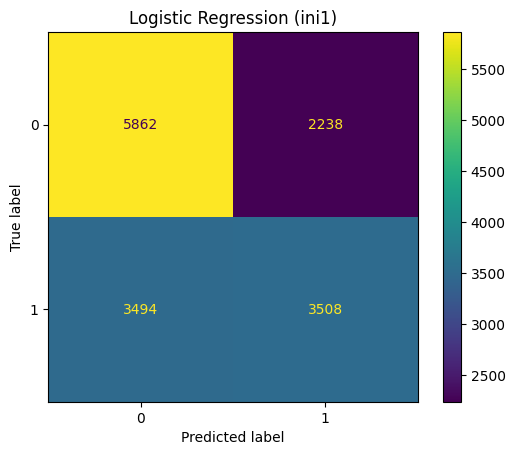

In [116]:
# plot confusion matrix
cm = confusion_matrix(ini1_y_test, ini1_log_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ini1_log.classes_)
disp.plot()
plt.title("Logistic Regression (ini1)")
plt.show()

In [117]:
# print training accuracy and testing accuracy
print("Training Accuracy: ", accuracy_score(ini1_y_train, ini1_log_y_pred_train))
print("Testing Accuracy: ", accuracy_score(ini1_y_test, ini1_log_y_pred))

Training Accuracy:  0.6292960731077412
Testing Accuracy:  0.6204476228314131


#### Random Forest

In [118]:
ini1_rf.fit(ini1_X_train, ini1_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'city_stadium']),
                                                 ('num', StandardScaler(),
                                                  ['balls_left', 'runs',
                                                   'crr'])])),
                ('classifier', RandomForestClassifier())])

In [119]:
ini1_rf_y_pred = ini1_rf.predict(ini1_X_test)
ini1_rf_y_pred_train = ini1_rf.predict(ini1_X_train)

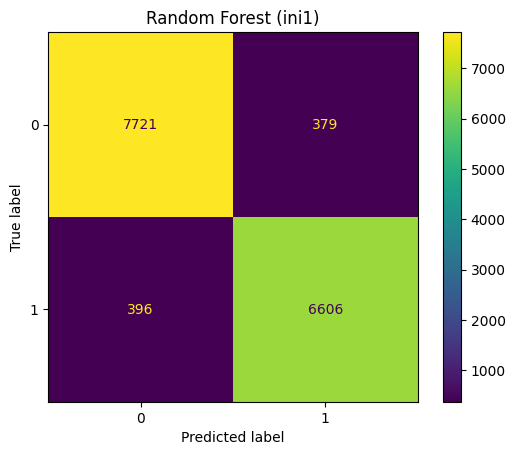

In [120]:
# plot confusion matrix
cm = confusion_matrix(ini1_y_test, ini1_rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest (ini1)")
plt.show()

In [121]:
print("Training Accuracy: ", accuracy_score(ini1_y_train, ini1_rf_y_pred_train))
print("Testing Accuracy: ", accuracy_score(ini1_y_test, ini1_rf_y_pred))

Training Accuracy:  0.9955632077345871
Testing Accuracy:  0.948682293735929


#### XGBoost

In [122]:
ini1_xgb.fit(ini1_X_train, ini1_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'city_stadium']),
                                                 ('num', StandardScaler(),
                                                  ['balls_left', 'runs',
                                                   'crr'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_round...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [123]:
ini1_xgb_y_pred = ini1_xgb.predict(ini1_X_test)
ini1_xgb_y_pred_train = ini1_xgb.predict(ini1_X_train)

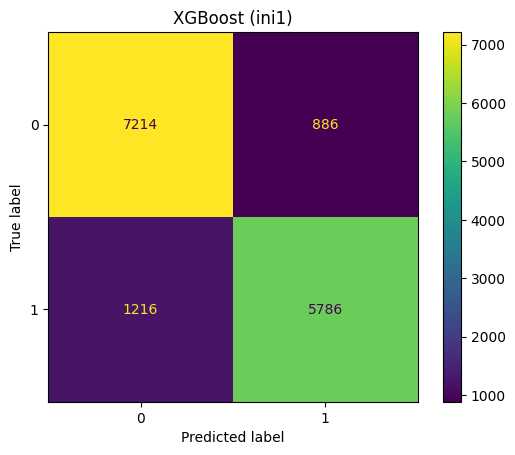

In [124]:
# plot confusion matrix
cm = confusion_matrix(ini1_y_test, ini1_xgb_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("XGBoost (ini1)")
plt.show()

In [125]:
print("Training Accuracy: ", accuracy_score(ini1_y_train, ini1_xgb_y_pred_train))
print("Testing Accuracy: ", accuracy_score(ini1_y_test, ini1_xgb_y_pred))

Training Accuracy:  0.8813158069002053
Testing Accuracy:  0.8608131373328036


#### SVM with poly kernel

In [127]:
# ini1_svm_poly.fit(ini1_X_train, ini1_y_train)

KeyboardInterrupt: 

In [472]:
# ini1_svm_poly_y_pred = ini1_svm_poly.predict(ini1_X_test)
# ini1_svm_poly_y_pred_train = ini1_svm_poly.predict(ini1_X_train)

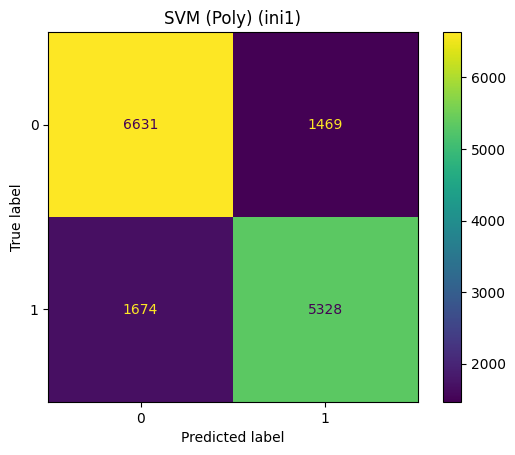

In [462]:
# plot confusion matrix
# cm = confusion_matrix(ini1_y_test, ini1_svm_poly_y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.title("SVM (Poly) (ini1)")
# plt.show()

In [473]:
# print("Training Accuracy: ", accuracy_score(ini1_y_train, ini1_svm_poly_y_pred_train))
# print("Testing Accuracy: ", accuracy_score(ini1_y_test, ini1_svm_poly_y_pred))

Training Accuracy:  0.7994503675253295
Testing Accuracy:  0.7918818699509999


#### SVM with rbf kernel

In [126]:
# ini1_svm_rbf.fit(ini1_X_train, ini1_y_train)

In [474]:
# ini1_svm_rbf_y_pred = ini1_svm_rbf.predict(ini1_X_test)
# ini1_svm_rbf_y_pred_train = ini1_svm_rbf.predict(ini1_X_train)

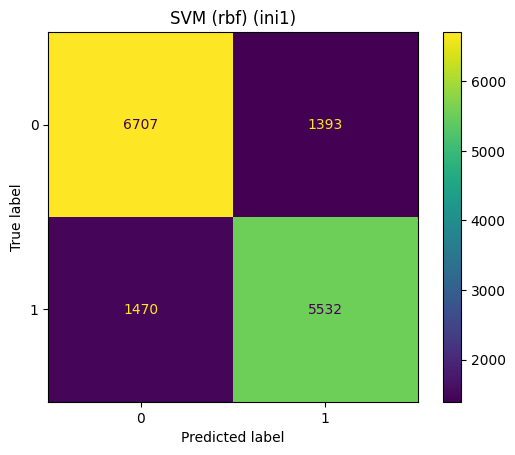

In [465]:
# # plot confusion matrix
# cm = confusion_matrix(ini1_y_test, ini1_svm_rbf_y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.title("SVM (rbf) (ini1)")
# plt.show()

In [475]:
# print("Training Accuracy: ", accuracy_score(ini1_y_train, ini1_svm_rbf_y_pred_train))
# print("Testing Accuracy: ", accuracy_score(ini1_y_test, ini1_svm_rbf_y_pred))

Training Accuracy:  0.8204257996159194
Testing Accuracy:  0.8104224606012449


## Innings 2

In [126]:
ini2_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['batting_team', 'bowling_team', 'city_stadium']),
        ('num', StandardScaler(), ['balls_left', 'runs_to_bat', 'crr', 'rrr'])
    ]
)

In [127]:
ini2_log = Pipeline(steps=[
    ('preprocessor', ini2_preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
])

ini2_rf = Pipeline(steps=[
    ('preprocessor', ini2_preprocessor),
    ('classifier', RandomForestClassifier())
])

ini2_svm_rbf = Pipeline(steps=[
    ('preprocessor', ini2_preprocessor),
    ('classifier', SVC(kernel='rbf'))
])

ini2_xgb = Pipeline(steps=[
    ('preprocessor', ini2_preprocessor),
    ('classifier', XGBClassifier())
])

#### Random Forest

In [128]:
ini2_rf.fit(ini2_X_train, ini2_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'city_stadium']),
                                                 ('num', StandardScaler(),
                                                  ['balls_left', 'runs_to_bat',
                                                   'crr', 'rrr'])])),
                ('classifier', RandomForestClassifier())])

In [129]:
ini2_rf_y_pred = ini2_rf.predict(ini2_X_test)
ini2_rf_y_pred_train = ini2_rf.predict(ini2_X_train)

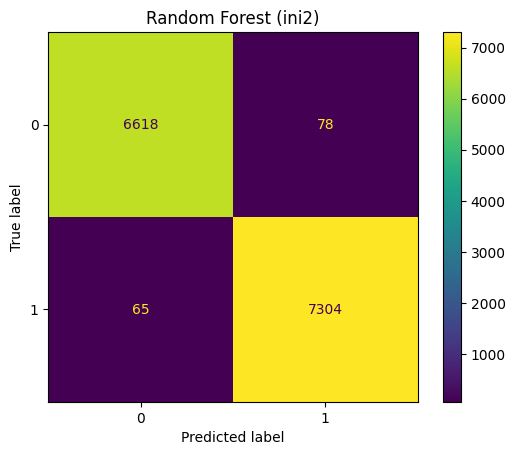

In [130]:
# plot confusion matrix
cm = confusion_matrix(ini2_y_test, ini2_rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest (ini2)")
plt.show()

In [131]:
print("Training Accuracy: ", accuracy_score(ini2_y_train, ini2_rf_y_pred_train))
print("Testing Accuracy: ", accuracy_score(ini2_y_test, ini2_rf_y_pred))

Training Accuracy:  0.9999822247502578
Testing Accuracy:  0.9898329185922503


#### Logistic Regression

In [132]:
ini2_log.fit(ini2_X_train, ini2_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'city_stadium']),
                                                 ('num', StandardScaler(),
                                                  ['balls_left', 'runs_to_bat',
                                                   'crr', 'rrr'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [133]:
ini2_log_y_pred = ini2_log.predict(ini2_X_test)
ini2_log_y_pred_train = ini2_log.predict(ini2_X_train)

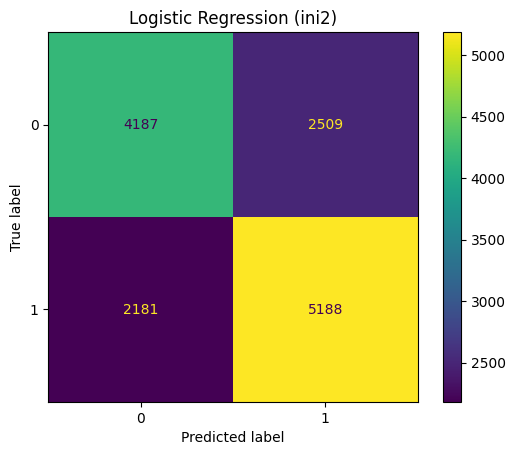

In [134]:
# plot confusion matrix
cm = confusion_matrix(ini2_y_test, ini2_log_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Logistic Regression (ini2)")
plt.show()

In [135]:
print("Training Accuracy: ", accuracy_score(ini2_y_train, ini2_log_y_pred_train))
print("Testing Accuracy: ", accuracy_score(ini2_y_test, ini2_log_y_pred))

Training Accuracy:  0.6621991538981122
Testing Accuracy:  0.6665481692143619


#### XGBoost

In [136]:
ini2_xgb.fit(ini2_X_train, ini2_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'city_stadium']),
                                                 ('num', StandardScaler(),
                                                  ['balls_left', 'runs_to_bat',
                                                   'crr', 'rrr'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_s...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [137]:
ini2_xgb_y_pred = ini2_xgb.predict(ini2_X_test)
ini2_xgb_y_pred_train = ini2_xgb.predict(ini2_X_train)

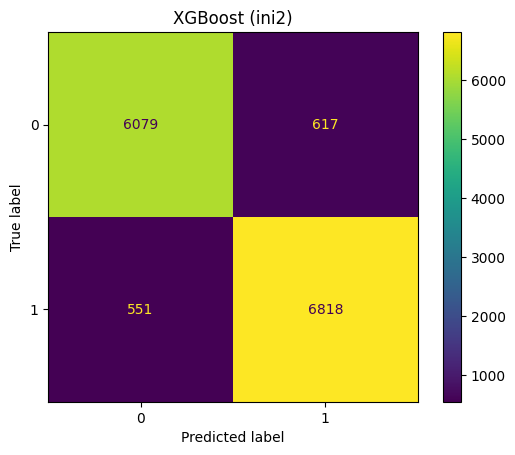

In [138]:
# plot confusion matrix
cm = confusion_matrix(ini2_y_test, ini2_xgb_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("XGBoost (ini2)")
plt.show()

In [139]:
print("Training Accuracy: ", accuracy_score(ini2_y_train, ini2_xgb_y_pred_train))
print("Testing Accuracy: ", accuracy_score(ini2_y_test, ini2_xgb_y_pred))

Training Accuracy:  0.9351558889402396
Testing Accuracy:  0.9169569854248134


#### SVM with rbf kernel

In [491]:
# ini2_svm_rbf.fit(ini2_X_train, ini2_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'city_stadium']),
                                                 ('num', StandardScaler(),
                                                  ['balls_left', 'runs_to_bat',
                                                   'crr', 'rrr'])])),
                ('classifier', SVC())])

In [492]:
# ini2_svm_rbf_y_pred = ini2_svm_rbf.predict(ini2_X_test)
# ini2_svm_rbf_y_pred_train = ini2_svm_rbf.predict(ini2_X_train)

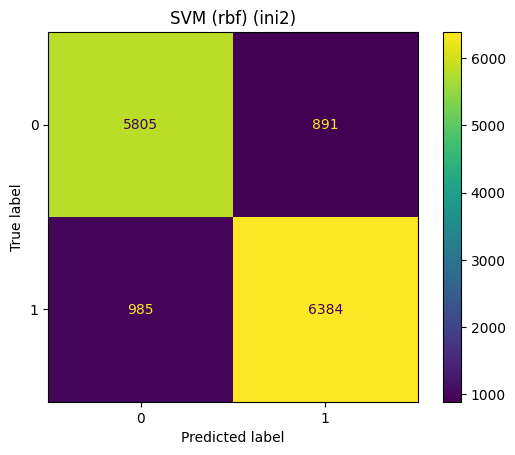

In [493]:
# plot confusion matrix
# cm = confusion_matrix(ini2_y_test, ini2_svm_rbf_y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.title("SVM (rbf) (ini2)")
# plt.show()

In [494]:
# print("Training Accuracy: ", accuracy_score(ini2_y_train, ini2_svm_rbf_y_pred_train))
# print("Testing Accuracy: ", accuracy_score(ini2_y_test, ini2_svm_rbf_y_pred))

Training Accuracy:  0.8675566141704291
Testing Accuracy:  0.8666192676857447


Probabilities
===

> The randome forest classifier performs much better than logistic regression. This was also expected since this data is small and very natural for descision trees to fit.

> Let us see the predicted probabilities for first 20 values

In [140]:
ini1_log.predict_proba(ini1_X_test)[:20, :]

array([[0.38934949, 0.61065051],
       [0.42456673, 0.57543327],
       [0.58480973, 0.41519027],
       [0.43945487, 0.56054513],
       [0.19547644, 0.80452356],
       [0.72325985, 0.27674015],
       [0.60592603, 0.39407397],
       [0.45900506, 0.54099494],
       [0.54925955, 0.45074045],
       [0.78679889, 0.21320111],
       [0.3807608 , 0.6192392 ],
       [0.19331092, 0.80668908],
       [0.58317909, 0.41682091],
       [0.60359034, 0.39640966],
       [0.8535935 , 0.1464065 ],
       [0.2044885 , 0.7955115 ],
       [0.54419334, 0.45580666],
       [0.66402723, 0.33597277],
       [0.67357531, 0.32642469],
       [0.68764967, 0.31235033]])

In [141]:
ini1_rf.predict_proba(ini1_X_test)[:20, :]

array([[0.06, 0.94],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.9 , 0.1 ],
       [0.29, 0.71],
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ]])

In [142]:
import numpy as np

def smooth_probabilities(probs, epsilon=1e-3):
    # Apply Laplace smoothing
    smoothed_probs = probs + epsilon
    # Normalize so that each row sums to 1
    smoothed_probs = smoothed_probs / smoothed_probs.sum(axis=1, keepdims=True)
    return smoothed_probs

In [143]:
1e-3

0.001

In [144]:
probs = ini1_rf.predict_proba(ini1_X_test)[:20, :]
smoothed_probs = smooth_probabilities(probs, epsilon = 0.3)
print(smoothed_probs)

[[0.225   0.775  ]
 [0.7875  0.2125 ]
 [0.80625 0.19375]
 [0.8     0.2    ]
 [0.1875  0.8125 ]
 [0.19375 0.80625]
 [0.1875  0.8125 ]
 [0.2125  0.7875 ]
 [0.76875 0.23125]
 [0.8125  0.1875 ]
 [0.2     0.8    ]
 [0.19375 0.80625]
 [0.8125  0.1875 ]
 [0.80625 0.19375]
 [0.8125  0.1875 ]
 [0.75    0.25   ]
 [0.36875 0.63125]
 [0.8125  0.1875 ]
 [0.79375 0.20625]
 [0.8125  0.1875 ]]


In [145]:
test_probs = ini1_rf.predict_proba(ini1_X_test)
test_probs.shape

(15102, 2)

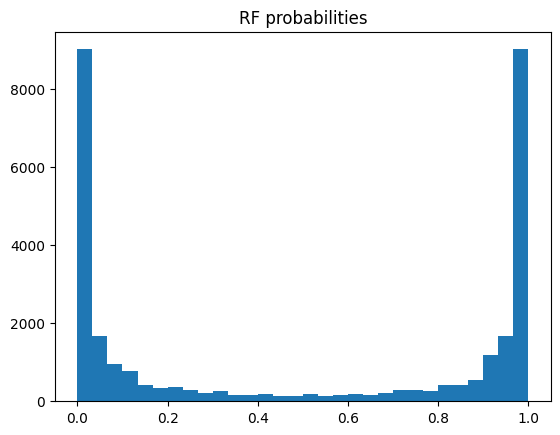

In [152]:
plt.hist(test_probs.flatten(), bins=30)
plt.title("RF probabilities")
plt.show()

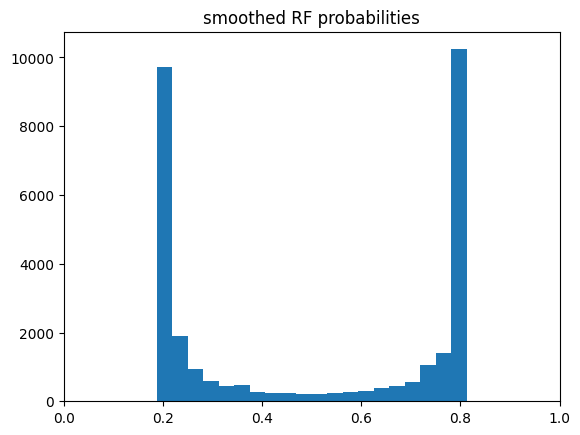

In [151]:
smoothed_probs = smooth_probabilities(test_probs, epsilon = 0.3)
plt.xlim(0, 1)
plt.hist(smoothed_probs.flatten(), bins=20)
plt.title("smoothed RF probabilities")
plt.show()

In [159]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


(process:49540): GLib-GIO-WARNING **: 01:41:47.232: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.708.200_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:49540): GLib-GIO-WARNING **: 01:41:47.296: Unexpectedly, UWP app `Microsoft.Windows.DevHome_0.1701.597.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.Windows.DevHome_8wekyb3d8bbwe!App') supports 1 extensions but has no verbs

(process:49540): GLib-GIO-WARNING **: 01:41:47.386: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2407.3.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:49540): GLib-GIO-WARNING **: 01:41:47.439: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.1.11620.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.123762 

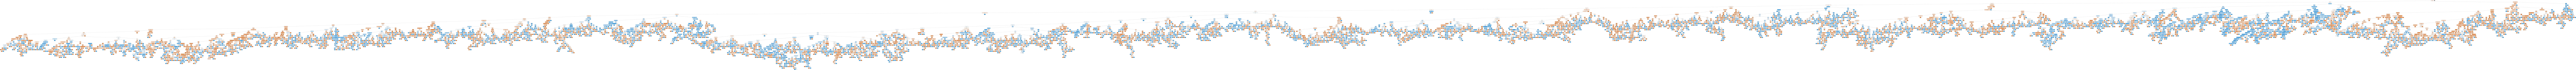


(process:55372): GLib-GIO-WARNING **: 01:42:36.088: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.708.200_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:55372): GLib-GIO-WARNING **: 01:42:36.136: Unexpectedly, UWP app `Microsoft.Windows.DevHome_0.1701.597.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.Windows.DevHome_8wekyb3d8bbwe!App') supports 1 extensions but has no verbs

(process:55372): GLib-GIO-WARNING **: 01:42:36.198: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2407.3.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:55372): GLib-GIO-WARNING **: 01:42:36.238: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.1.11620.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.123762 

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

<Figure size 640x480 with 0 Axes>

In [163]:
tree = ini1_rf.named_steps['classifier'].estimators_[0]  # Extracting the first tree

# Extract the preprocessor from the pipeline
preprocessor = ini1_rf.named_steps['preprocessor']

# Get the feature names from the OneHotEncoder and concatenate with numeric feature names
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['batting_team', 'bowling_team', 'city_stadium'])
num_features = ['balls_left', 'runs', 'crr']  # Numeric features as they are
feature_names = list(cat_features) + num_features


dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=feature_names, 
                           class_names=['Class 0', 'Class 1'],  # Modify according to your classes
                           filled=True, rounded=True, 
                           special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)  
image = graph.create_png()
display(Image(image))
# save img
graph.write_png("tree.png")

plt.figure()
img = mpimg.imread(image)
plt.imshow(img)
plt.axis('off')
plt.show()

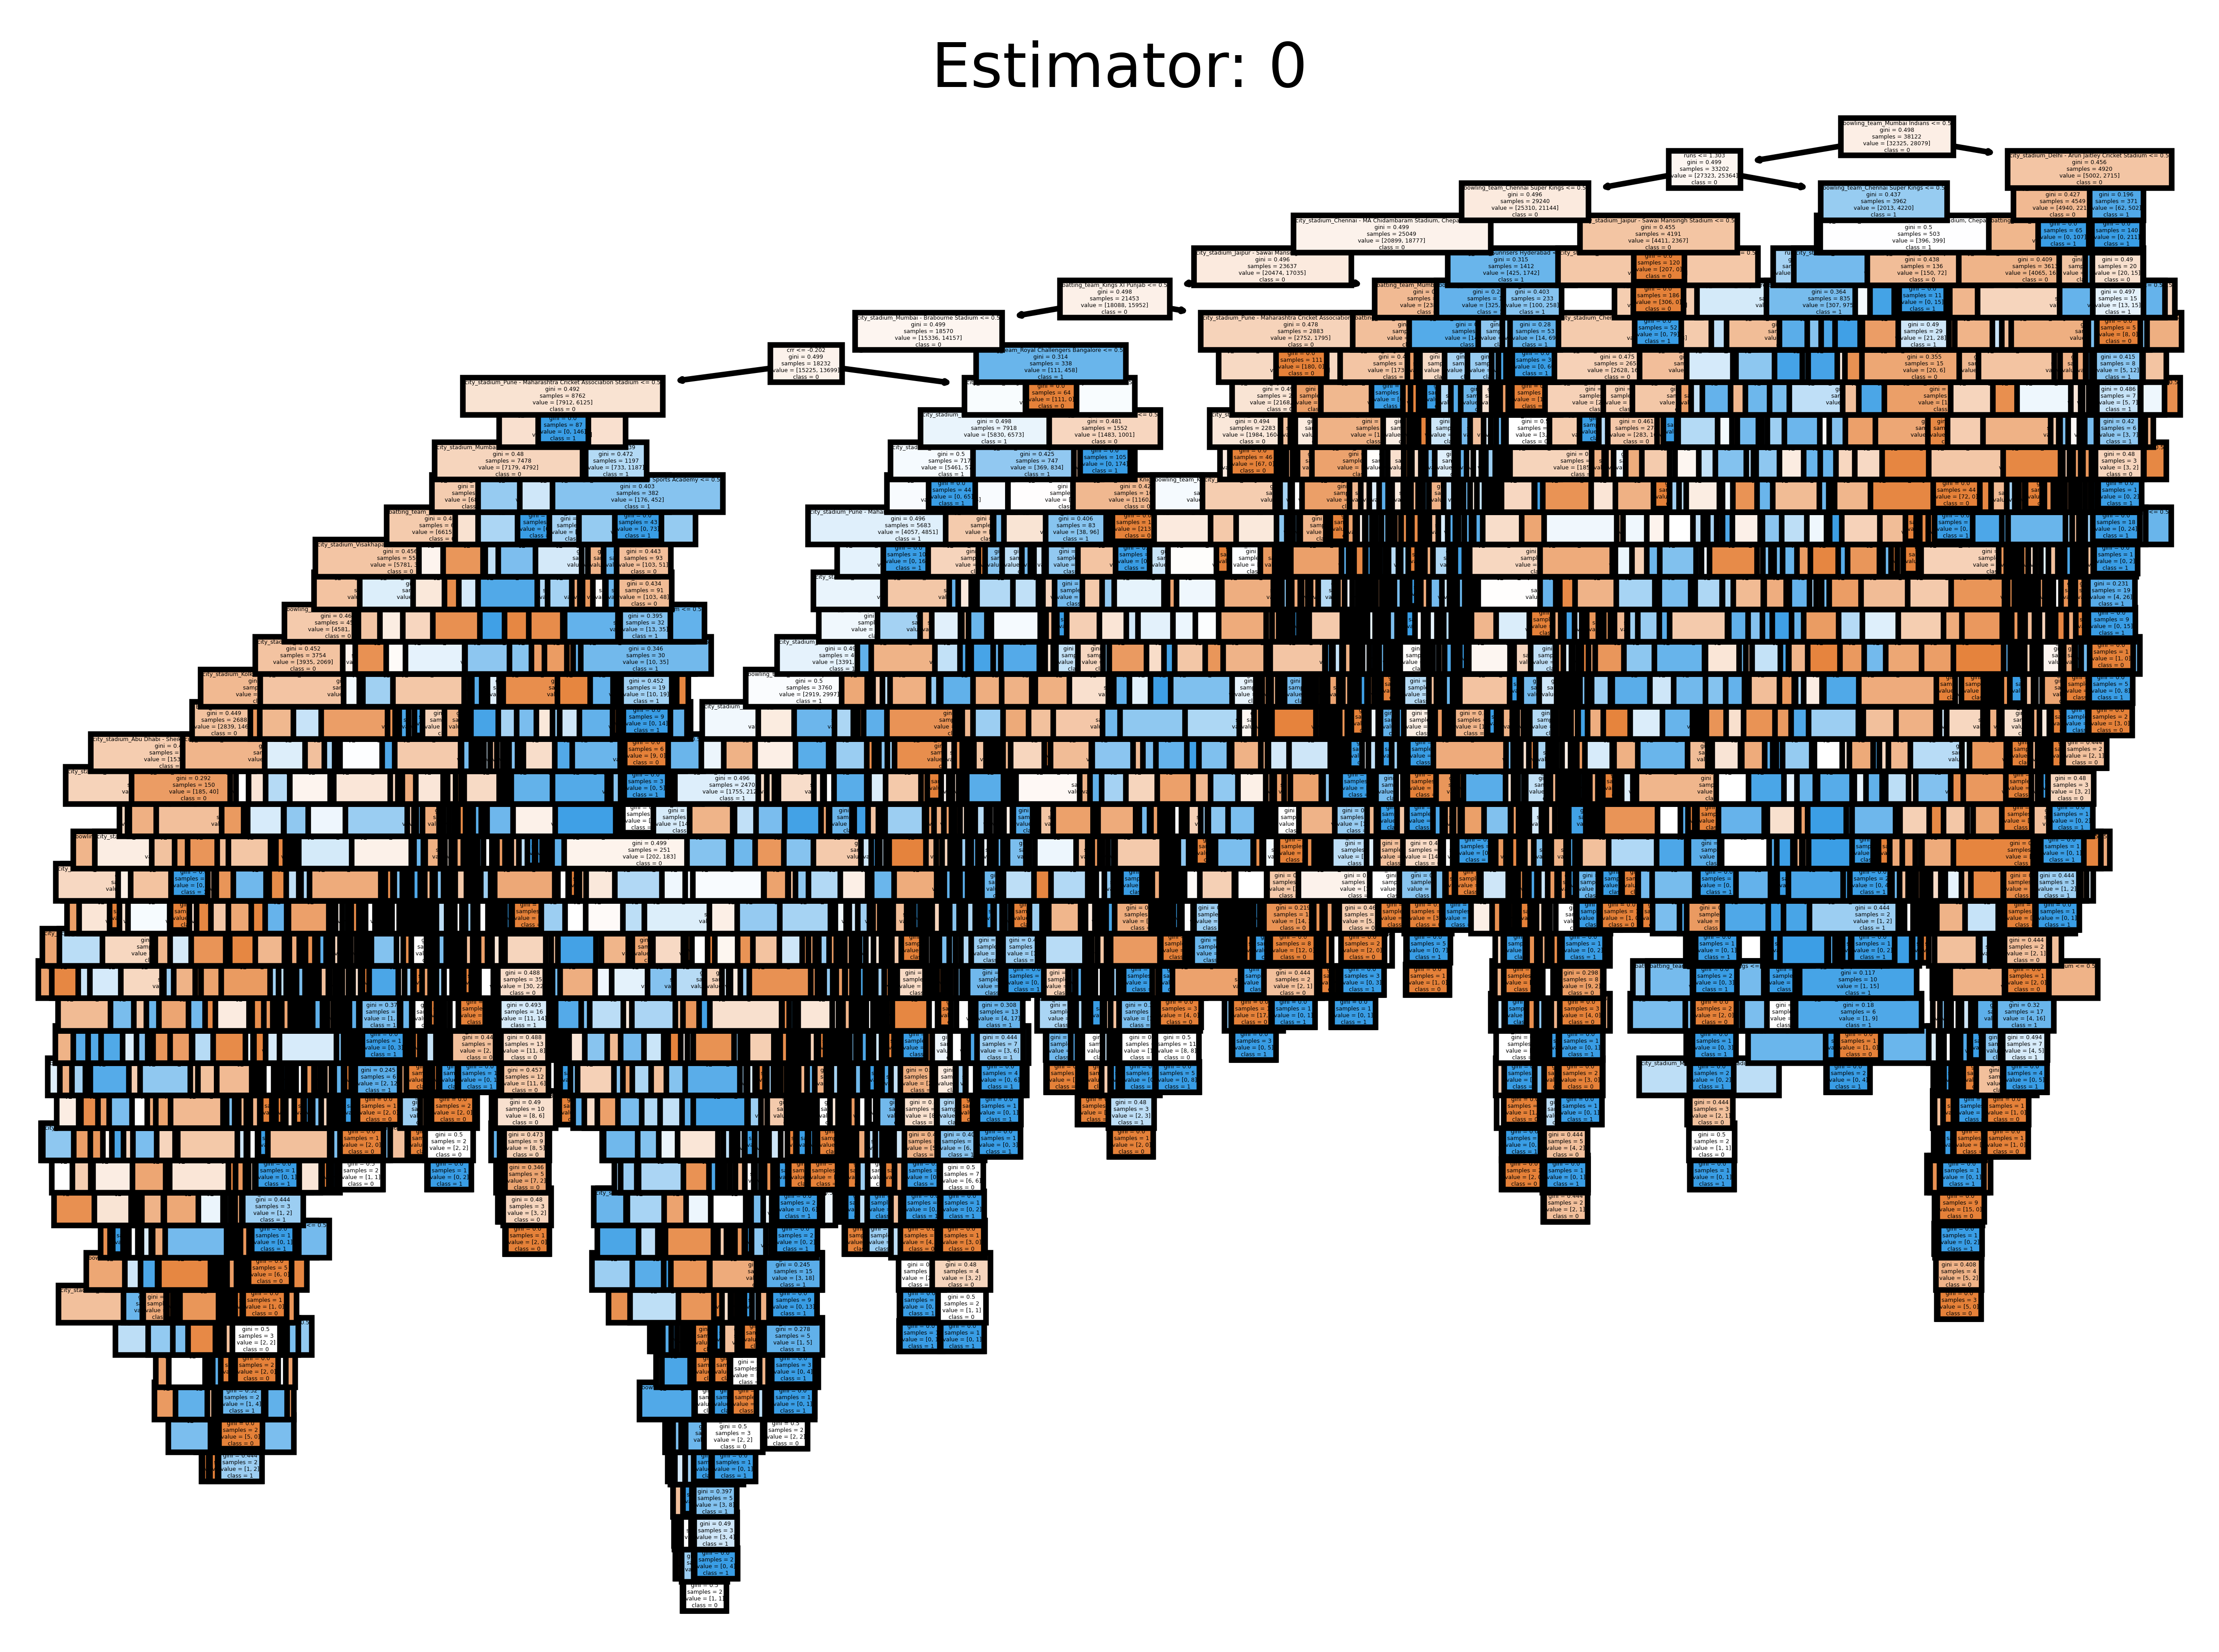

In [169]:
from sklearn.tree import plot_tree
fn=ini1_X.columns
cn=['0', '1']
fig, axes = plt.subplots(ncols=1, nrows=1, dpi=900)
plot_tree(tree, feature_names = feature_names, class_names=cn, filled = True, ax = axes);

axes.set_title('Estimator: ' + str(0), fontsize = 11)
fig.savefig('rf_5trees.png')

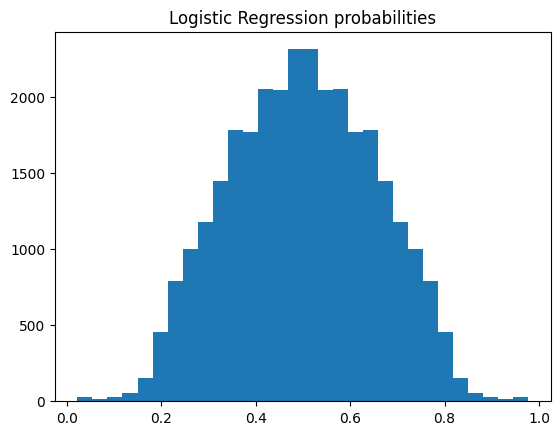

In [150]:
plt.hist(ini1_log.predict_proba(ini1_X_test).flatten(), bins=30)
plt.title("Logistic Regression probabilities")
plt.show()

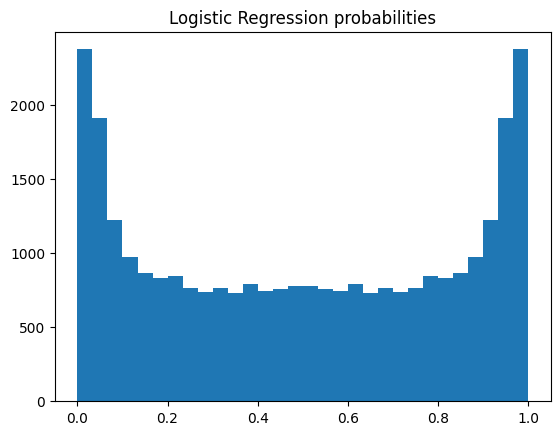

In [153]:
plt.hist(ini1_xgb.predict_proba(ini1_X_test).flatten(), bins=30)
plt.title("Logistic Regression probabilities")
plt.show()

## Note-
One thing to notice here is that although the random forest classifier gives much better accuracy, the probabilities calculated by it are very extreme in all cases.
Such extreme probabilities is not suitable for any kind of audience or situation. So it will be better to got with logistic regreesion to display probabilities

In [201]:
# We create a pickle file to save the model
import pickle

pickle.dump(ini1_rf, open('models/ini1_rf.pkl', 'wb'))
pickle.dump(ini1_log, open('models/ini1_log.pkl', 'wb'))
pickle.dump(ini1_xgb, open('models/ini1_xgb.pkl', 'wb'))

pickle.dump(ini2_rf, open('models/ini2_rf.pkl', 'wb'))
pickle.dump(ini2_log, open('models/ini2_log.pkl', 'wb'))
pickle.dump(ini2_xgb, open('models/ini2_xgb.pkl', 'wb'))

In [172]:
ini1_X.columns, ini2_X.columns

(Index(['batting_team', 'bowling_team', 'city_stadium', 'runs', 'balls_left',
        'wickets_left', 'crr'],
       dtype='object'),
 Index(['batting_team', 'bowling_team', 'city_stadium', 'runs_to_bat',
        'balls_left', 'wickets_left', 'crr', 'rrr'],
       dtype='object'))

In [174]:
sorted(ini1_X['batting_team'].unique()), sorted(ini2_X['batting_team'].unique())

(['Chennai Super Kings',
  'Delhi Capitals',
  'Kings XI Punjab',
  'Kolkata Knight Riders',
  'Mumbai Indians',
  'Rajasthan Royals',
  'Royal Challengers Bangalore',
  'Sunrisers Hyderabad'],
 ['Chennai Super Kings',
  'Delhi Capitals',
  'Kings XI Punjab',
  'Kolkata Knight Riders',
  'Mumbai Indians',
  'Rajasthan Royals',
  'Royal Challengers Bangalore',
  'Sunrisers Hyderabad'])

In [176]:
sorted(ini1_X['city_stadium'].unique())

['Abu Dhabi - Sheikh Zayed Stadium',
 'Ahmedabad - Sardar Patel Stadium, Motera',
 'Bangalore - M Chinnaswamy Stadium',
 'Chennai - MA Chidambaram Stadium, Chepauk',
 'Cuttack - Barabati Stadium',
 'Delhi - Arun Jaitley Cricket Stadium',
 'Dharamsala',
 'Dubai - Dubai International Cricket Stadium',
 'Hyderabad',
 'Indore - Holkar Cricket Stadium',
 'Jaipur - Sawai Mansingh Stadium',
 'Kolkata - Eden Gardens',
 'Mohali - IS Bindra Stadium',
 'Mumbai - Brabourne Stadium',
 'Mumbai - Dr DY Patil Sports Academy',
 'Mumbai - Wankhede Stadium',
 'Pune - MCA Stadium',
 'Pune - Maharashtra Cricket Association Stadium',
 'Sharjah',
 'Visakhapatnam - YSR Reddy Stadium']

In [177]:
sorted(ini2_X['city_stadium'].unique())

['Abu Dhabi - Sheikh Zayed Stadium',
 'Ahmedabad - Sardar Patel Stadium, Motera',
 'Bangalore - M Chinnaswamy Stadium',
 'Chennai - MA Chidambaram Stadium, Chepauk',
 'Cuttack - Barabati Stadium',
 'Delhi - Arun Jaitley Cricket Stadium',
 'Dharamsala',
 'Dubai - Dubai International Cricket Stadium',
 'Hyderabad',
 'Indore - Holkar Cricket Stadium',
 'Jaipur - Sawai Mansingh Stadium',
 'Kolkata - Eden Gardens',
 'Mohali - IS Bindra Stadium',
 'Mumbai - Brabourne Stadium',
 'Mumbai - Dr DY Patil Sports Academy',
 'Mumbai - Wankhede Stadium',
 'Pune - MCA Stadium',
 'Pune - Maharashtra Cricket Association Stadium',
 'Sharjah',
 'Visakhapatnam - YSR Reddy Stadium']

In [202]:
test_model = pickle.load(open('models\ini2_rf.pkl', 'rb'))

In [203]:
print(type(test_model))

<class 'sklearn.pipeline.Pipeline'>


In [204]:
input_df = pd.DataFrame({
            'batting_team': ['Chennai Super Kings'],
            'bowling_team': ['Mumbai Indians'],
            'city_stadium': ['Hyderabad'],
            'runs_to_bat': [30],
            'balls_left': [18],
            'wickets_left': [4],
            'crr': [150/17],
            'rrr': [30/3]
        })

In [205]:
test_model.predict_proba(input_df)

array([[0.42, 0.58]])

In [212]:
from Utils import pipe
pipe1 = pipe()
pipe1.ini2_pipe.predict_proba(input_df)

array([[0.42, 0.58]])

<!-- # Experiments -->

In [138]:
sorted(final_df['venue'].unique())

['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [2]:
import pickle
pipe = pickle.load(open('model.pkl', 'rb'))

In [4]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [5]:
pipe.steps

[('step1',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('trf',
                                   OneHotEncoder(drop='first', sparse=False),
                                   ['batting_team', 'bowling_team', 'city'])])),
 ('step2', LogisticRegression(solver='liblinear'))]

In [18]:
print(pipe.named_steps['step2'].coef_.shape)
pipe.named_steps['step2'].coef_

(1, 39)


array([[-3.59649641e+00, -4.57844069e-01, -6.10560258e-01,
         1.26248492e-01, -1.64315597e-01, -8.03051599e-01,
        -1.67596032e+00,  6.89616775e-01,  2.82260274e-01,
        -1.90255054e-01, -3.81702556e-01,  2.51456124e-01,
         6.62740776e-01,  2.72785557e-01, -3.64147931e-01,
         4.26089959e-01, -7.84707623e-01,  9.16264834e-02,
        -9.14716144e-02, -5.29556689e-01, -5.12263624e-01,
         2.13459827e-01,  1.94999894e+00,  7.05875432e-01,
         7.72725277e-01, -1.90881079e-02,  2.34888828e-02,
        -4.03644726e+00,  1.48719084e-01, -1.35860973e+00,
         1.41341067e+00,  6.64737068e-01,  9.69575276e-01,
        -2.97826427e-02,  1.68669020e-03,  7.71824780e-01,
        -1.59896547e-02, -5.42725549e-04, -9.54275946e-04]])

In [20]:
pipe.feature_names_in_

array(['batting_team', 'bowling_team', 'city', 'runs_to_bat',
       'balls_left', 'wickets_left', 'target', 'crr', 'rrr'], dtype=object)

In [25]:
pipe.named_steps['step1']

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])

In [78]:
input_df = pd.DataFrame({
            'batting_team': ['Chennai Super Kings'],
            'bowling_team': ['Mumbai Indians'],
            'venue': ['Wankhede Stadium'],
            'runs_to_bat': [30],
            'balls_left': [18],
            'wickets_left': [4],
            'target': [180],
            'crr': [150/17],
            'rrr': [30/3]
        })

In [79]:
pipe.predict_proba(input_df)

array([[0.69651172, 0.30348828]])

In [80]:
sorted(final_df['batting_team'].unique())

['Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [81]:
teams = ['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [82]:
type(teams)

list

In [85]:
teams

['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [86]:
import pandas as pd
input_df = pd.DataFrame({
            'batting_team': ['Chennai Super Kings'],
            'bowling_team': ['Delhi Capitals'],
            'city': ['Arun Jaitley Cricket Stadium'],
            'runs_to_bat': [120],
            'balls_left': [12],
            'wickets_left': [9],
            'target': [132],
            'crr': [1],
            'rrr': [120/12]
        })

In [87]:
pipe_log.predict_proba(input_df)

array([[0.12775994, 0.87224006]])

In [2]:
import pandas as pd

plot = pd.read_csv(r"C:\Users\praya\OneDrive\Desktop\plot.csv")
plot.head()

SRH  DC
0   64  36
1   67  33
2   71  29
3   75  25
4   78  22

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
plot['index'] = np.array(range(1,21))

In [16]:
plot['DC'] = -1*plot['DC']

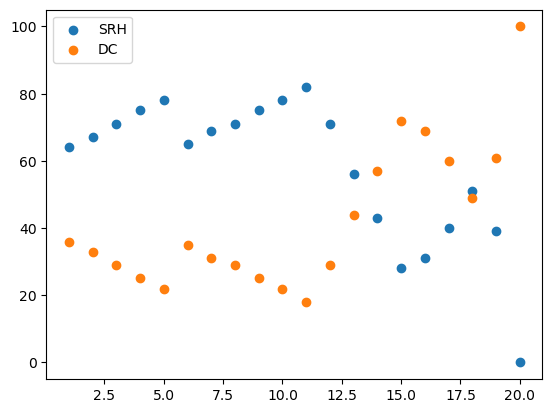

In [18]:
plt.scatter(plot['index'], plot['SRH'], label='SRH')
plt.scatter(plot['index'], plot['DC'], label='DC')
plt.legend()